# Анализ бизнес-показателей приложения Procrastinate Pro+

Несмотря на огромные вложения в рекламу развлекательного приложения Procrastinate Pro+, последние несколько месяцев компания терпит убытки. 

**Задача** — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

- лог сервера с данными об их посещениях
- выгрузка их покупок за этот период
- рекламные расходы

**Шаги**:
- выяснить откуда приходят пользователи и какими устройствами они пользуются
- сколько стоит привлечение пользователей из различных рекламных каналов
- сколько денег приносит каждый клиент
- когда расходы на привлечение клиента окупаются
- какие факторы мешают привлечению клиентов

## Описание данных
В нашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.


Структура **visits_info_short.csv**:
    
    - User Id — уникальный идентификатор пользователя,
    - Region — страна пользователя,
    - Device — тип устройства пользователя,
    - Channel — идентификатор источника перехода,
    - Session Start — дата и время начала сессии,
    - Session End — дата и время окончания сессии.


Структура **orders_info_short.csv**:

    - User Id — уникальный идентификатор пользователя,
    - Event Dt — дата и время покупки,
    - Revenue — сумма заказа.


Структура **costs_info_short.csv**:
    
    - dt — дата проведения рекламной кампании,
    - Channel — идентификатор рекламного источника,
    - costs — расходы на эту кампанию.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. 
- заказы: `/datasets/orders_info_short.csv`. 
- расходы: `/datasets/costs_info_short.csv`. 

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

#### Импортируем нужные библиотеки

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

#### Загрузим нужные датасеты

In [2]:
visits = pd.read_csv('C:\\Users\\User\\OneDrive\\Desktop\\da_practicum\\CSV\\project_6\\visits_info_short.csv')

In [3]:
purchases = pd.read_csv('C:\\Users\\User\\OneDrive\\Desktop\\da_practicum\\CSV\\project_6\\orders_info_short.csv')

In [4]:
costs = pd.read_csv('C:\\Users\\User\\OneDrive\\Desktop\\da_practicum\\CSV\\project_6\\costs_info_short.csv')

In [5]:
def data_first_view(data):
    # Вывод первых 10 строк
    print("Первые 10 строк данных:")
    display(data.head(10))
    print('*' * 50)
    
    # Информация о данных
    print("\nИнформация о данных:")
    display(data.info())
    print('*' * 50)
    
    # Имена столбцов
    print("\nИмена столбцов:")
    display(data.columns)
    print('*' * 50)
    
    # Описательная статистика
    print("\nОписательная статистика:")
    display(data.describe())
    print('*' * 50)
    
    # Количество пропущенных значений
    print("\nКоличество пропущенных значений в каждом столбце:")
    display(data.isna().sum())
    print('*' * 50)
    
    # Количество дубликатов
    print("\nКоличество дубликатов:")
    display(data.duplicated().sum())

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Отличная функция для первичного анализа, но несколько комментариев-рекомендаций:
* для вывода `info` дополнительно необязательно писать `display`
* `isna` частично дублирует информацию `info`, поэтому в принципе его можно опустить
* лучше как-нибудь аналитику при помощи разных методов, по разным функциям отделить друг от друга, например рекомендую такой разделитель `print('*'*50)`
</div>

#### Рассмотрим данные о визитах

In [6]:
data_first_view(visits)

Первые 10 строк данных:


User Id         Region   Device         Channel        Session Start  \
0  981449118918  United States   iPhone         organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone         organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac         organic  2019-05-01 14:09:25   
3  326433527971  United States  Android          TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac         organic  2019-05-01 03:33:35   
5   90242400005  United States   iPhone  RocketSuperAds  2019-05-01 07:14:52   
6   43958116050  United States  Android         organic  2019-05-01 09:03:21   
7  185365244969  United States   iPhone         organic  2019-05-01 09:37:03   
8  446013509831  United States   iPhone  RocketSuperAds  2019-05-01 10:26:00   
9  100970711362  United States      Mac          TipTop  2019-05-01 04:39:53   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  
5  2019-05-01 08:19:56  
6  2019-05-01 10:08:39  
7  2019-05-01 10:00:43  
8  2019-05-01 10:59:17  
9  2019-05-01 04:57:05

**************************************************

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

**************************************************

Имена столбцов:


Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')

**************************************************

Описательная статистика:


User Id
count  3.099010e+05
mean   4.997664e+11
std    2.887899e+11
min    5.993260e+05
25%    2.493691e+11
50%    4.989906e+11
75%    7.495211e+11
max    9.999996e+11

**************************************************

Количество пропущенных значений в каждом столбце:


User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

**************************************************

Количество дубликатов:


0

Видим некорректные названия столбцов, для удобства сделаем названия в нижнем регистре и добавим разделитель в виде "_"

In [7]:
visits.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)

In [8]:
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Также рассмотрим уникальные значения в столбцах region, device и channel.

In [9]:
column_names = ['region', 'device', 'channel']

for column in column_names:
    unique_values = visits[column].unique()
    print(f'Уникальные значения в столбце {column}: {unique_values} \n')

Уникальные значения в столбце region: ['United States' 'UK' 'France' 'Germany'] 

Уникальные значения в столбце device: ['iPhone' 'Mac' 'Android' 'PC'] 

Уникальные значения в столбце channel: ['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds'] 



Также приведем столбцы с информацией о начале и конце сессии к типу datetime.

In [10]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

В датасете с информацией о визитах содержится 309901 запись, пропусков и дубликатов в данных нет. Стоит обратить внимания на названия столбцов, для удобства они были изменены на нижний регистр, а также был добавлен разделитель в виде нижнего подчеркивания. Также были проверены уникальные значения в столбцах region, device и channel, неявных дубликатов нет. Тип данных у столбцов с информацией о начале и конце сессии привели к типу datetime.

#### Рассмотрим данные о заказах

In [11]:
data_first_view(purchases)

Первые 10 строк данных:


User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99
5  129100331057  2019-05-01 01:56:28     4.99
6  626807144131  2019-05-01 02:39:21     4.99
7  914062168985  2019-05-01 02:02:18     4.99
8  769669137453  2019-05-01 03:39:47     4.99
9  434198630691  2019-05-01 18:16:50     5.99

**************************************************

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

**************************************************

Имена столбцов:


Index(['User Id', 'Event Dt', 'Revenue'], dtype='object')

**************************************************

Описательная статистика:


User Id       Revenue
count  4.021200e+04  40212.000000
mean   4.990295e+11      5.370608
std    2.860937e+11      3.454208
min    5.993260e+05      4.990000
25%    2.511324e+11      4.990000
50%    4.982840e+11      4.990000
75%    7.433327e+11      4.990000
max    9.998954e+11     49.990000

**************************************************

Количество пропущенных значений в каждом столбце:


User Id     0
Event Dt    0
Revenue     0
dtype: int64

**************************************************

Количество дубликатов:


0

In [12]:
purchases.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)

In [13]:
purchases['event_dt'] = pd.to_datetime(purchases['event_dt'])

Датасет о заказах содержит 40212 строк. Данные не содержат пропусков и дубликатов. Стоит также обратить внимание на названия столбцов, как и в случае с датасетом visits. Тип данных у столбца **event_dt** изменили на datetime для дальнейшей работы.

#### Рассмотрим данные о расходах

In [14]:
data_first_view(costs)

Первые 10 строк данных:


dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1
5  2019-05-06  FaceBoom  118.8
6  2019-05-07  FaceBoom  101.2
7  2019-05-08  FaceBoom  100.1
8  2019-05-09  FaceBoom   93.5
9  2019-05-10  FaceBoom  104.5

**************************************************

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

**************************************************

Имена столбцов:


Index(['dt', 'Channel', 'costs'], dtype='object')

**************************************************

Описательная статистика:


costs
count  1800.000000
mean     58.609611
std     107.740223
min       0.800000
25%       6.495000
50%      12.285000
75%      33.600000
max     630.000000

**************************************************

Количество пропущенных значений в каждом столбце:


dt         0
Channel    0
costs      0
dtype: int64

**************************************************

Количество дубликатов:


0

In [15]:
costs.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)

In [16]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

In [17]:
costs['dt'] = pd.to_datetime(costs['dt'])

Данные о расходах представлены корректно, пропусков и дубликатов нет, но также стоит обратить внимание на названия столбцов. Тип данных у столбца **dt** был изменен на datetime.

**Промежуточный вывод по шагу 1.**

- В датасете с информацией о визитах содержится 309901 запись, пропусков и дубликатов в данных нет. Стоит обратить внимания на названия столбцов, для удобства они были изменены на нижний регистр, а также был добавлен разделитель в виде нижнего подчеркивания. Также были проверены уникальные значения в столбцах region, device и channel, неявных дубликатов нет. Тип данных у столбцов с информацией о начале и конце сессии привели к типу datetime.


- Датасет о заказах содержит 40212 записей. Данные не содержат пропусков и дубликатов. Стоит также обратить внимание на названия столбцов, как и в случае с датасетом visits. Тип данных у столбца event_dt изменили на datetime для дальнейшей работы.


- Датасет о расходах содержит 1800 записей. Данные о расходах представлены корректно, пропусков и дубликатов нет, но также стоит обратить внимание на названия столбцов. Тип данных у столбца dt был изменен на datetime.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функция для создания профилей пользователей

In [18]:
def get_profiles(sessions, orders, ad_costs):
    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'])
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # Преобразование столбца dt в datetime в ad_costs и new_users
    ad_costs['dt'] = pd.to_datetime(ad_costs['dt'])
    new_users['dt'] = pd.to_datetime(new_users['dt'])

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


#### Функция для подсчета Retention Rate

In [19]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Функция для подсчета конверсии

In [20]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для подсчета LTV

In [21]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Функция для сглаживания данных

In [22]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

#### Функция для построения графика Retention Rate

In [23]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

#### Функция для  построения графика конверсии

In [24]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### Функция для визуализации LTV и ROI

In [25]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Профили пользователей. Минимальная и максимальная дата привлечения пользователей.

In [26]:
profiles = get_profiles(visits, purchases, costs)
profiles

user_id            first_ts       channel  device         region  \
0             599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1            4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
2            6085896 2019-10-01 09:58:33       organic  iPhone         France   
3           22593348 2019-08-22 21:35:48    AdNonSense      PC        Germany   
4           31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
...              ...                 ...           ...     ...            ...   
150003  999956196527 2019-09-28 08:33:02        TipTop  iPhone  United States   
150004  999975439887 2019-10-21 00:35:17       organic      PC             UK   
150005  999976332130 2019-07-23 02:57:06        TipTop  iPhone  United States   
150006  999979924135 2019-09-28 21:28:09  MediaTornado      PC  United States   
150007  999999563947 2019-10-18 19:57:25       organic  iPhone  United States   

               dt      month  payer  acquisition_cost  
0      2019-05-07 2019-05-01   True          1.088172  
1      2019-07-09 2019-07-01  False          1.107237  
2      2019-10-01 2019-10-01  False          0.000000  
3      2019-08-22 2019-08-01  False          0.988235  
4      2019-10-02 2019-10-01  False          0.230769  
...           ...        ...    ...               ...  
150003 2019-09-28 2019-09-01  False          3.500000  
150004 2019-10-21 2019-10-01  False          0.000000  
150005 2019-07-23 2019-07-01  False          2.600000  
150006 2019-09-28 2019-09-01  False          0.205714  
150007 2019-10-18 2019-10-01  False          0.000000  

[150008 rows x 9 columns]

In [27]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  datetime64[ns]
 6   month             150008 non-null  datetime64[s] 
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](2), datetime64[s](1), float64(1), int64(1), object(3)
memory usage: 9.3+ MB


In [28]:
min_data = profiles['first_ts'].min()
max_data = profiles['first_ts'].max()

print(f'Минимальная дата привлечения пользователей: {min_data} \n')
print(f'Максимальная дата привлечения пользователей: {max_data}')

Минимальная дата привлечения пользователей: 2019-05-01 00:00:41 

Максимальная дата привлечения пользователей: 2019-10-27 23:59:04


Первые пользователи были привлечены 01.05.2019, а последние 27.10.2019. Данные соответствуют действительности, период анализа составляет 6 месяцев.

#### Страны пользователей.

In [29]:
def calculate_payment(profiles, group_by_column):
    grouped_payment = (profiles.groupby(group_by_column)
                       .agg({'user_id': 'nunique', 'payer': 'sum'})
                       .sort_values(by='user_id', ascending=False))
    grouped_payment['payer_ratio'] = grouped_payment['payer'] / grouped_payment['user_id'] * 100
    return grouped_payment

In [30]:
country_payment = calculate_payment(profiles, 'region')
country_payment

user_id  payer  payer_ratio
region                                    
United States   100002   6902     6.901862
UK               17575    700     3.982930
France           17450    663     3.799427
Germany          14981    616     4.111875

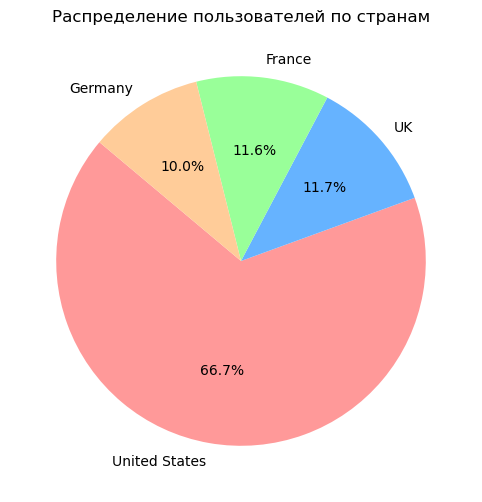

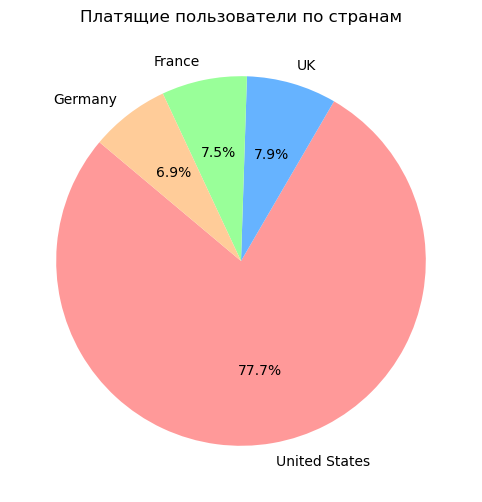

In [31]:
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Круговая диаграмма для уникальных пользователей по странам
plt.figure(figsize=(10, 6))
country_payment['user_id'].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Распределение пользователей по странам')
plt.ylabel('')
plt.show()

# Круговая диаграмма платящих уникальных пользователей по странам
plt.figure(figsize=(10, 6))
country_payment['payer'].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Платящие пользователи по странам')
plt.ylabel('')
plt.show()

- На данном шаге мы выяснили, что пользователи приходят из следующих стран: США, Великобритания, Франция и Германия. 


- 66,7% пользователей приложения Procrastinate Pro+ проживают в США, затем идут пользователи из Великобритании - 11,7%, Франции - 11,6%, Пользователей из Германии меньше всего - 10%. 


- Также мы рассмотрели количество платящих пользоватлей. Больше всего таких пользователей в США - 6902 (77,7%), меньше всего платящих пользователей в Германии - 616 (6,9%)


- Рассматривая долю платящий пользователей по каждой страны мы выяснили, что самая большая доля таких пользователей в США - 6,9%, а самая маленькая во Франции - 3,79%.

#### Устройства пользователей.

In [32]:
device_payment = calculate_payment(profiles, 'device')
device_payment

user_id  payer  payer_ratio
device                              
iPhone     54479   3382     6.207897
Android    35032   2050     5.851793
PC         30455   1537     5.046790
Mac        30042   1912     6.364423

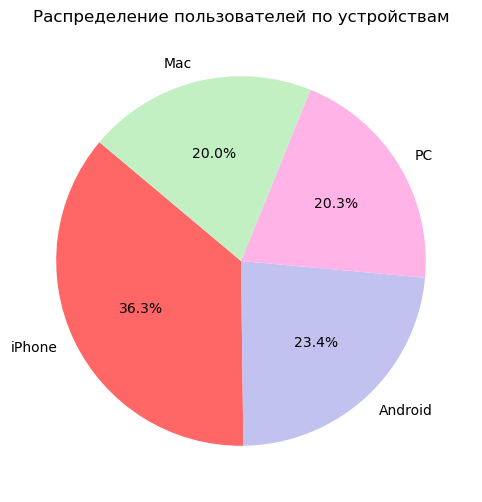

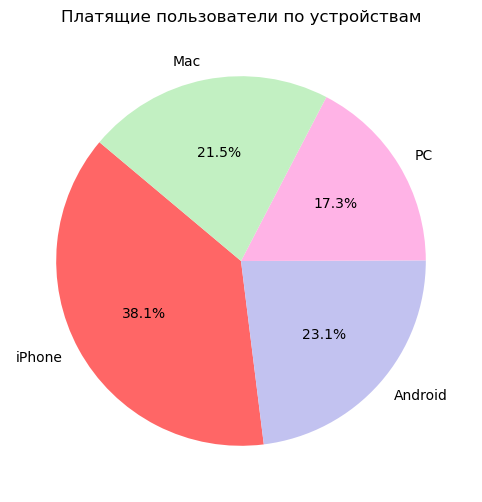

In [33]:
colors = ['#ff6666', '#c2c2f0', '#ffb3e6', '#c2f0c2']
# Круговая диаграмма для уникальных пользователей по устройствам
plt.figure(figsize=(10, 6))
device_payment['user_id'].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Распределение пользователей по устройствам')
plt.ylabel('')
plt.show()

# Круговая диаграмма платящих уникальных пользователей по устройствам
plt.figure(figsize=(10, 6))
device_payment['payer'].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Платящие пользователи по устройствам')
plt.ylabel('')
plt.show()

Рассматривая пользователей в разрезе устройств мы можем сделать следующие выводы:

- Больше всего пользователей, которые используют Iphone - 54479 человека (36,3% от общего числа уникальных пользователей), затем идут пользователи Android (23.4%), PC (20.3%) и Mac(20%).

- Если говорить только о платящих пользователях, то большинство из них используют Iphone (38,1%), затем идут пользователи Android (23,1%), Mac (21,5%), а меньше всего платящих пользователей на платформе PC (17,3%).

- Однако, ситуация с долей платящих пользователей немного другая. Самая большая доля платящих пользователей используют Mac (6,36%), а самая маленькая доля платящих пользователей приходится на PC (5,04%). 

#### Рекламные источники.

In [34]:
channel_payment = calculate_payment(profiles, 'channel')
channel_payment

user_id  payer  payer_ratio
channel                                        
organic               56439   1160     2.055316
FaceBoom              29144   3557    12.204914
TipTop                19561   1878     9.600736
OppleCreativeMedia     8605    233     2.707728
LeapBob                8553    262     3.063253
WahooNetBanner         8553    453     5.296387
RocketSuperAds         4448    352     7.913669
MediaTornado           4364    156     3.574702
YRabbit                4312    165     3.826531
AdNonSense             3880    440    11.340206
lambdaMediaAds         2149    225    10.469986

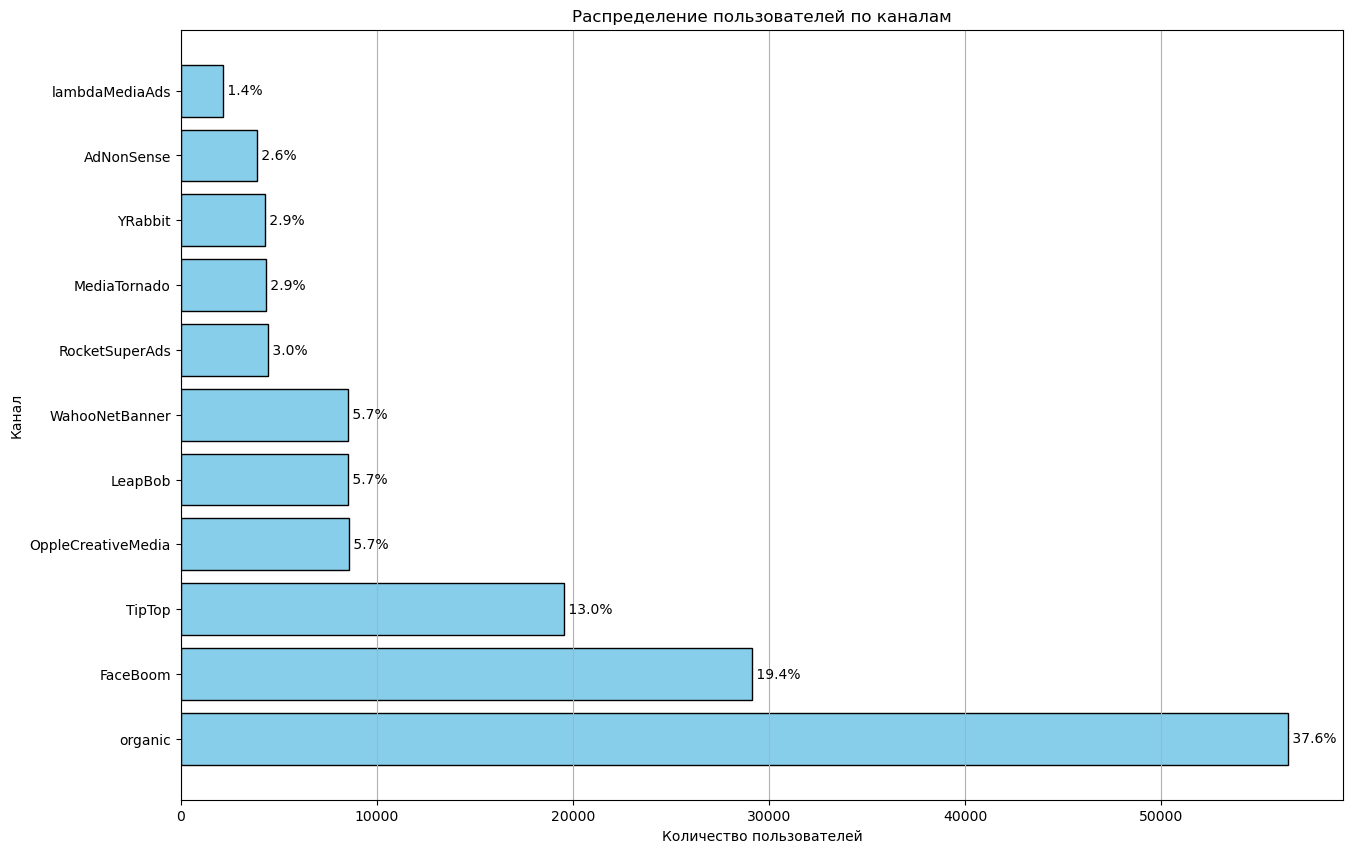

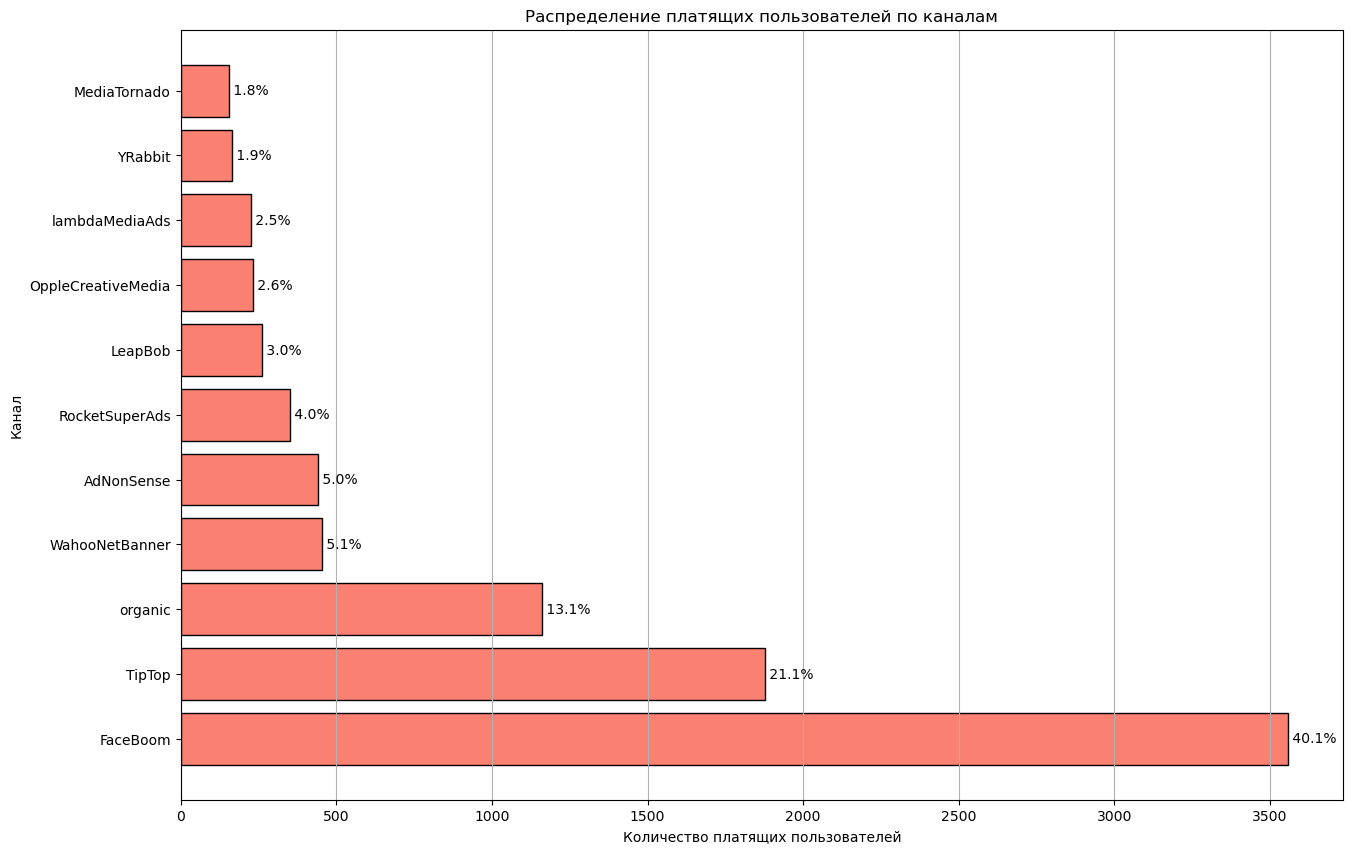

In [35]:
plt.figure(figsize=(15, 10))
bars = plt.barh(channel_payment.index, channel_payment['user_id'], color='skyblue', edgecolor='black')

# Добавление процентов на столбцы
total = channel_payment['user_id'].sum()
for bar in bars:
    width = bar.get_width()
    percentage = (width / total) * 100
    plt.text(width, bar.get_y() + bar.get_height() / 2, f' {percentage:.1f}%', va='center')


plt.grid(axis='x')
plt.title('Распределение пользователей по каналам')
plt.xlabel('Количество пользователей')
plt.ylabel('Канал')
plt.show()


channel_payment_sorted = channel_payment.sort_values(by='payer', ascending=False)


plt.figure(figsize=(15, 10))
bars = plt.barh(channel_payment_sorted.index, channel_payment_sorted['payer'], color='salmon', edgecolor='black')

# Добавление процентов на столбцы
total = channel_payment_sorted['payer'].sum()
for bar in bars:
    width = bar.get_width()
    percentage = (width / total) * 100
    plt.text(width, bar.get_y() + bar.get_height() / 2, f' {percentage:.1f}%', va='center')

plt.grid(axis='x')
plt.title('Распределение платящих пользователей по каналам')
plt.xlabel('Количество платящих пользователей')
plt.ylabel('Канал')
plt.show()

На основе анализа каналов привлечения пользователей мы можем сделать следующие выводы:

- Всего у нас 11 каналов привлечения пользователей. Больше всего пользователей пришли из **organic**, то есть нашли приложение сами, их 56439 человек (37,6% от общего числа уникальных пользователей). Меньше всего пользователей пришли из канала **LambdaMediaAds** - 2149 человек (1,4% от общего числа уникальных пользователей).

- Рассматривая только платящих пользователей мы видим, что больше всего таких пользователей пришли из **FaceBoom** - 3557 человек (40,1% от общего числа платящих пользователей), меньше всего платящих пользователей привел канал **MediaTornado** - 233 человека (1,8%).

- Если говорить о доле платящих пользователей, то самый большой показатель у канала **FaceBoom** (12,2%), а самая маленький у канала **OppleCreativeMedia** (2,7%).  

**Промежуточный вывод по шагу 3.**

Мы составили профили пользователей по странам, устройствам и каналам привлечения. Первые пользователи были привлечены 01.05.2019, а последние 27.10.2019. Данные соответствуют действительности, период анализа составляет 6 месяцев.


1. Страны пользователей 
- На данном шаге мы выяснили, что пользователи приходят из следующих стран: США, Великобритания, Франция и Германия.
66,7% пользователей приложения Procrastinate Pro+ проживают в США, затем идут пользователи из Великобритании - 11,7%, Франции - 11,6%, Пользователей из Германии меньше всего - 10%.
- Также мы рассмотрели количество платящих пользоватлей. Больше всего таких пользователей в США - 6902 (77,7%), меньше всего платящих пользователей в Германии - 616 (6,9%)
- Рассматривая долю платящий пользователей по каждой страны мы выяснили, что самая большая доля таких пользователей в США - 6,9%, а самая маленькая во Франции - 3,79%.


2. Устройства

- Больше всего пользователей, которые используют Iphone - 54479 человека (36,3% от общего числа уникальных пользователей), затем идут пользователи Android (23.4%), PC (20.3%) и Mac(20%).
- Если говорить только о платящих пользователях, то большинство из них используют Iphone (38,1%), затем идут пользователи Android (23,1%), Mac (21,5%), а меньше всего платящих пользователей на платформе PC (17,3%).
- Однако, ситуация с долей платящих пользователей немного другая. Самая большая доля платящих пользователей используют Mac (6,36%), а самая маленькая доля платящих пользователей приходится на PC (5,04%).

3. Каналы привлечения

- Всего у нас 11 каналов привлечения пользователей. Больше всего пользователей пришли из organic, то есть нашли приложение сами, их 56439 человек (37,6% от общего числа уникальных пользователей). Меньше всего пользователей пришли из канала LambdaMediaAds - 2149 человек (1,4% от общего числа уникальных пользователей).
- Рассматривая только платящих пользователей мы видим, что больше всего таких пользователей пришли из FaceBoom - 3557 человек (40,1% от общего числа платящих пользователей), меньше всего платящих пользователей привел канал MediaTornado - 233 человека (1,8%).
- Если говорить о доле платящих пользователей, то самый большой показатель у канала FaceBoom (12,2%), а самая маленький у канала OppleCreativeMedia (2,7%).

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Общая сумма расходов на маркетинг

In [36]:
total_costs = round(costs['costs'].sum(), 2)
print(f'Общая сумма расходов на маркетинг составляет: {total_costs}')

Общая сумма расходов на маркетинг составляет: 105497.3


#### Распределение затрат по источникам

In [37]:
channel_costs = profiles.groupby('channel').agg({'acquisition_cost': 'sum'}).sort_values(by='acquisition_cost', ascending=False)
channel_costs

acquisition_cost
channel                             
TipTop                      54751.30
FaceBoom                    32445.60
WahooNetBanner               5151.00
AdNonSense                   3911.25
OppleCreativeMedia           2151.25
RocketSuperAds               1833.00
LeapBob                      1797.60
lambdaMediaAds               1557.60
MediaTornado                  954.48
YRabbit                       944.22
organic                         0.00

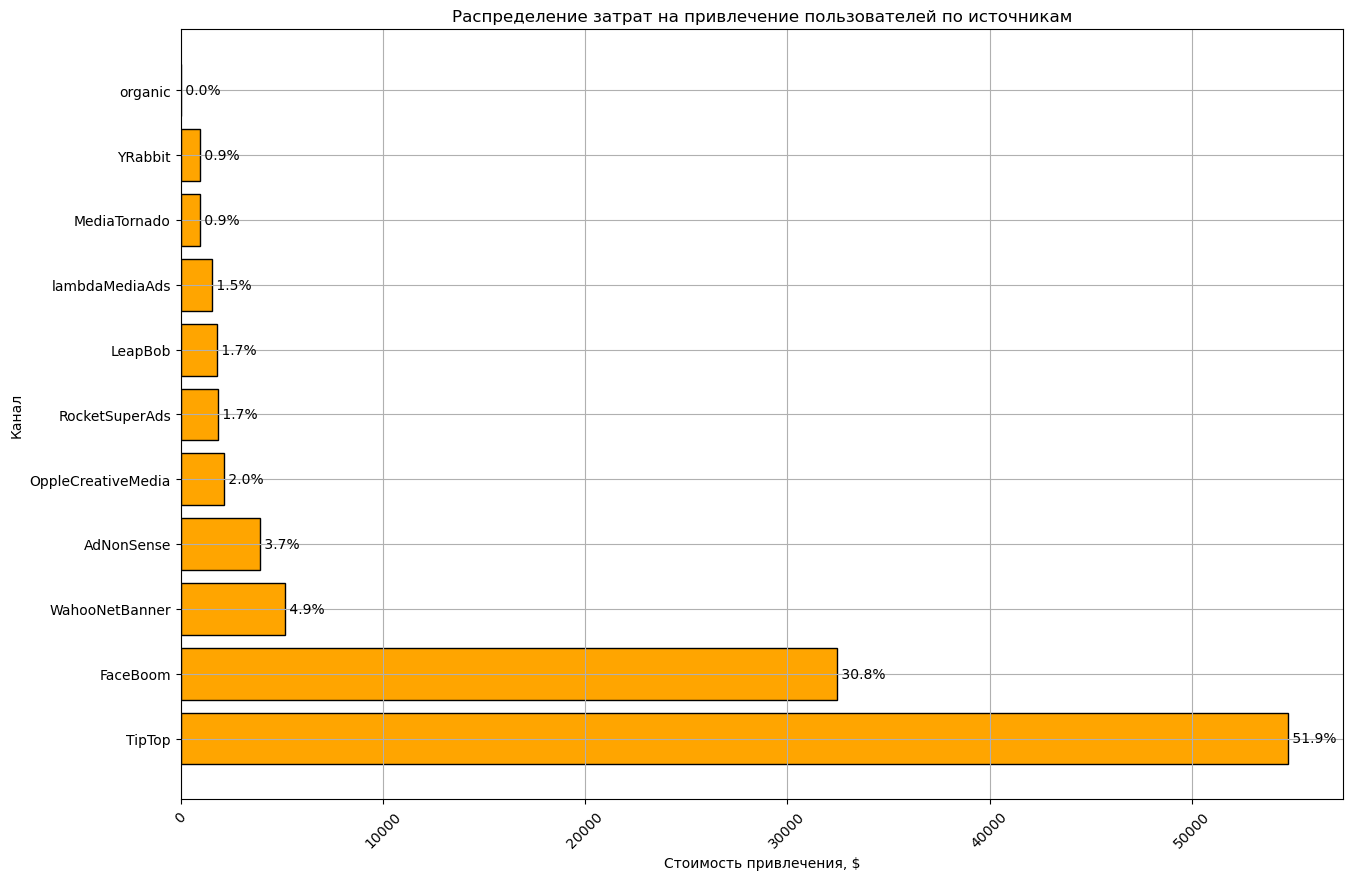

In [38]:
plt.figure(figsize=(15, 10))
bars = plt.barh(channel_costs.index, channel_costs['acquisition_cost'], color='orange', edgecolor='black')

# Добавляем подписи к каждому столбцу
for bar in bars:
    # Значение затрат
    value = bar.get_width()
    # Процентное соотношение
    percentage = (value / total_costs) * 100
    # Текст подписи
    label = f' {percentage:.1f}%'
    plt.text(value, bar.get_y() + bar.get_height()/2, 
             label, 
             va='center', ha='left', fontsize=10)

plt.grid()
plt.title('Распределение затрат на привлечение пользователей по источникам')
plt.xlabel('Стоимость привлечения, $')
plt.ylabel('Канал')
plt.xticks(rotation=45)

plt.show()

- Общая сумма расходов на маркетинг составляет: 105497.3$. Из них компания больше всего тратит на TipTop - 54751,30 (51,9 от общей суммы расходов) и на FaceBoom - 32445,60 (30,8% от общей суммы расходов). 

- Для более детального анализа рассмотрим расходы на маркетинг по неделям и месяцам.

#### Динамика изменения расходов на маркетинг

##### Динамика расходов на маркетинг по неделям

In [39]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


In [40]:
costs['week'] = costs['dt'].dt.isocalendar().week

In [41]:
week_channel_costs = costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')


In [42]:
week_channel_costs

channel  AdNonSense  FaceBoom  LeapBob  MediaTornado  OppleCreativeMedia  \
week                                                                       
18           211.05     535.7    16.80         38.64               24.00   
19           273.00     750.2    31.71         61.68               34.50   
20           265.65     755.7    26.67         59.04               27.50   
21           266.70     722.7    26.67         50.16               34.25   
22           202.65    1208.9    65.52         36.96               81.75   
23           102.90    1081.3    66.99         27.60               79.50   
24            96.60    1042.8    52.29         29.76               71.50   
25           141.75    1280.4    68.46         32.16               79.75   
26           148.05    1647.8    99.75         40.56              107.00   
27           130.20    1536.7    87.36         43.44              102.50   
28           106.05    1124.2    62.58         28.80               81.00   
29            97.65     975.7    61.11         26.40               68.00   
30           118.65    1130.8    67.20         25.20               80.75   
31           141.75    1419.0    83.58         35.04               90.75   
32           116.55    1290.3    87.57         29.04              104.00   
33           117.60    1456.4    77.49         40.80               98.50   
34           142.80    1411.3    90.51         35.28              103.75   
35           133.35    1445.4    77.91         33.84               92.75   
36           100.80    1151.7    66.99         30.24               72.75   
37           100.80    1148.4    63.84         25.92               78.00   
38           139.65    1496.0    81.27         30.24              105.75   
39           192.15    1837.0   101.22         48.24              132.25   
40           155.40    1761.1   101.01         42.00              123.00   
41           136.50    1392.6    78.96         36.96               88.25   
42           118.65    1291.4    69.72         29.04               88.00   
43           154.35    1552.1    84.42         37.44              101.50   

channel  RocketSuperAds  TipTop  WahooNetBanner  YRabbit  lambdaMediaAds  
week                                                                      
18               99.450   347.0            49.2    52.20            81.6  
19              139.230   470.0            92.4    75.90           103.2  
20              138.060   454.0            90.0    69.30            90.4  
21              131.040   801.8            79.2    65.40           119.2  
22               97.695  1421.2           179.4    49.80            83.2  
23               76.050  1223.6           196.8    25.80            35.2  
24               63.180  1121.0           166.2    17.46            45.6  
25               80.730  1474.4           201.6    22.14            40.0  
26               78.260  2343.6           285.0    27.90            59.2  
27               75.075  2340.0           256.8    28.26            60.0  
28               55.965  1820.0           174.0    19.44            44.8  
29               41.860  1552.2           159.6    15.66            41.6  
30               54.600  1713.4           182.4    22.86            49.6  
31               61.880  2493.6           204.6    27.33            52.0  
32               69.615  2448.0           231.6    28.56            41.6  
33               62.010  2538.0           238.2    28.56            46.4  
34               40.300  2514.0           244.8    30.03            57.6  
35               51.350  2583.0           235.8    24.36            54.4  
36               40.625  2563.0           174.6    27.93            52.0  
37               40.950  2506.0           192.6    29.76            41.6  
38               56.225  3241.0           226.2    39.60            57.6  
39               63.700  3979.5           303.0    47.52            80.0  
40               66.300  3703.0           309.0    45.36            59.

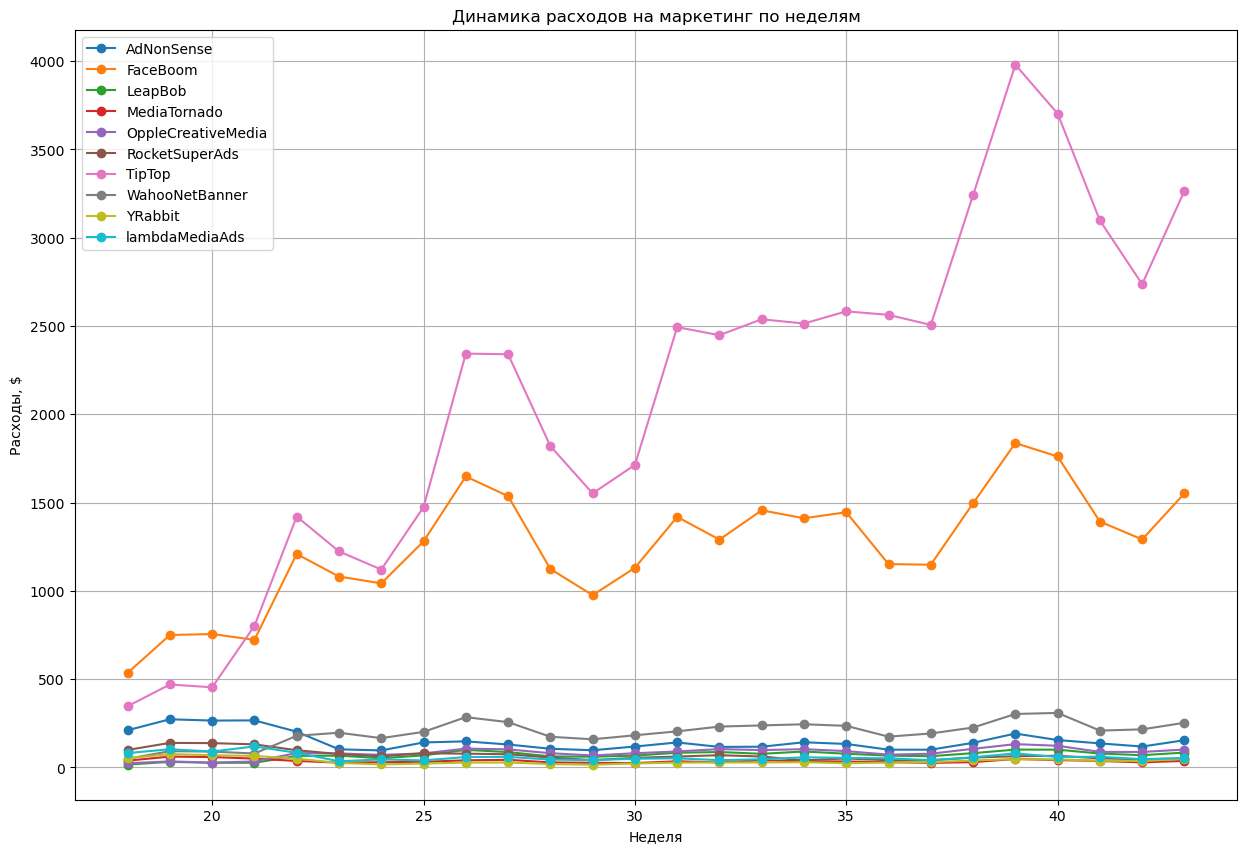

In [43]:
plt.figure(figsize=(15, 10))

for column in week_channel_costs.columns:
    plt.plot(week_channel_costs.index, week_channel_costs[column], label=column, marker='o')

plt.title('Динамика расходов на маркетинг по неделям')
plt.xlabel('Неделя')
plt.ylabel('Расходы, $')
plt.legend()
plt.grid()

plt.show()

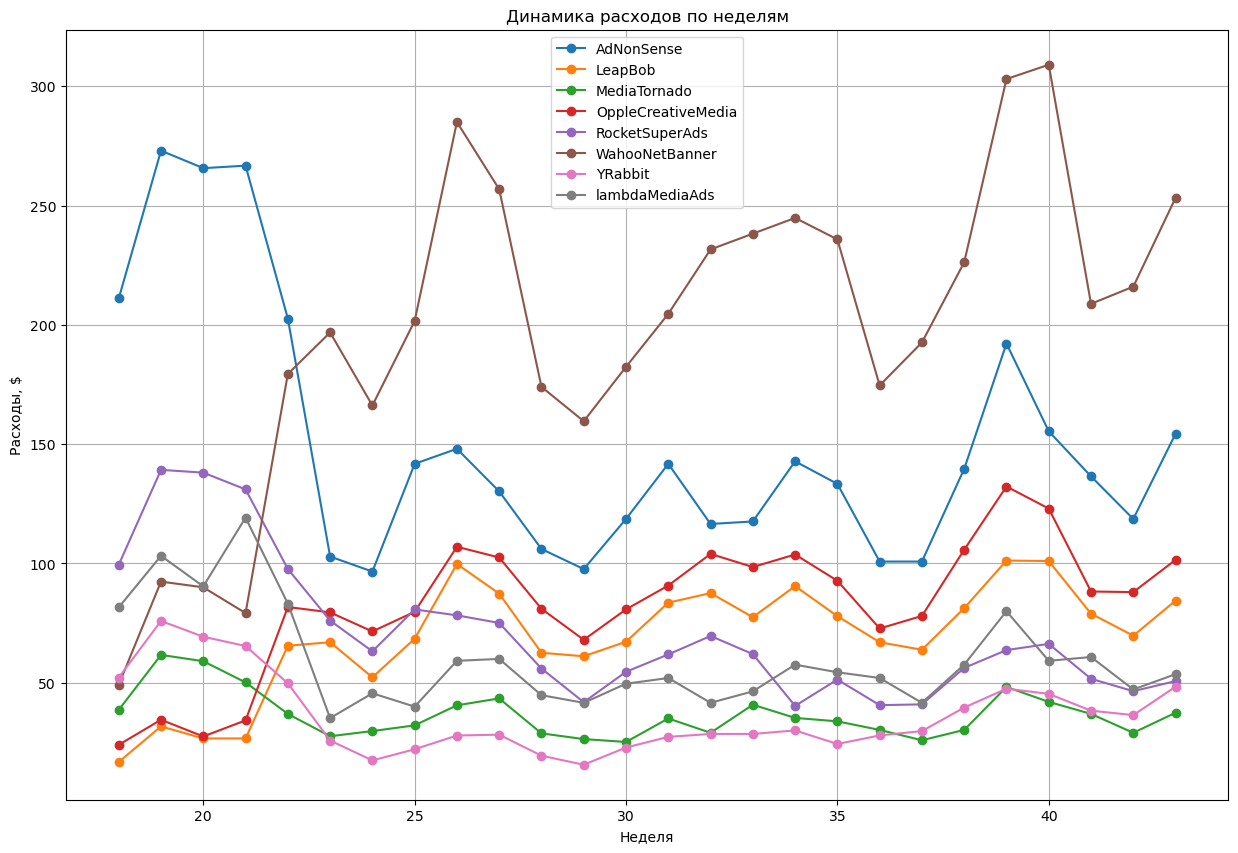

In [44]:
plt.figure(figsize=(15, 10))

for column in week_channel_costs.columns:
    if column != 'TipTop' and column != 'FaceBoom':
        plt.plot(week_channel_costs.index, week_channel_costs[column], label=column, marker='o')

plt.title('Динамика расходов по неделям')
plt.xlabel('Неделя')
plt.ylabel('Расходы, $')
plt.legend()
plt.grid()

plt.show()

In [45]:
week_costs = costs.groupby('week').agg({'costs': 'sum'})

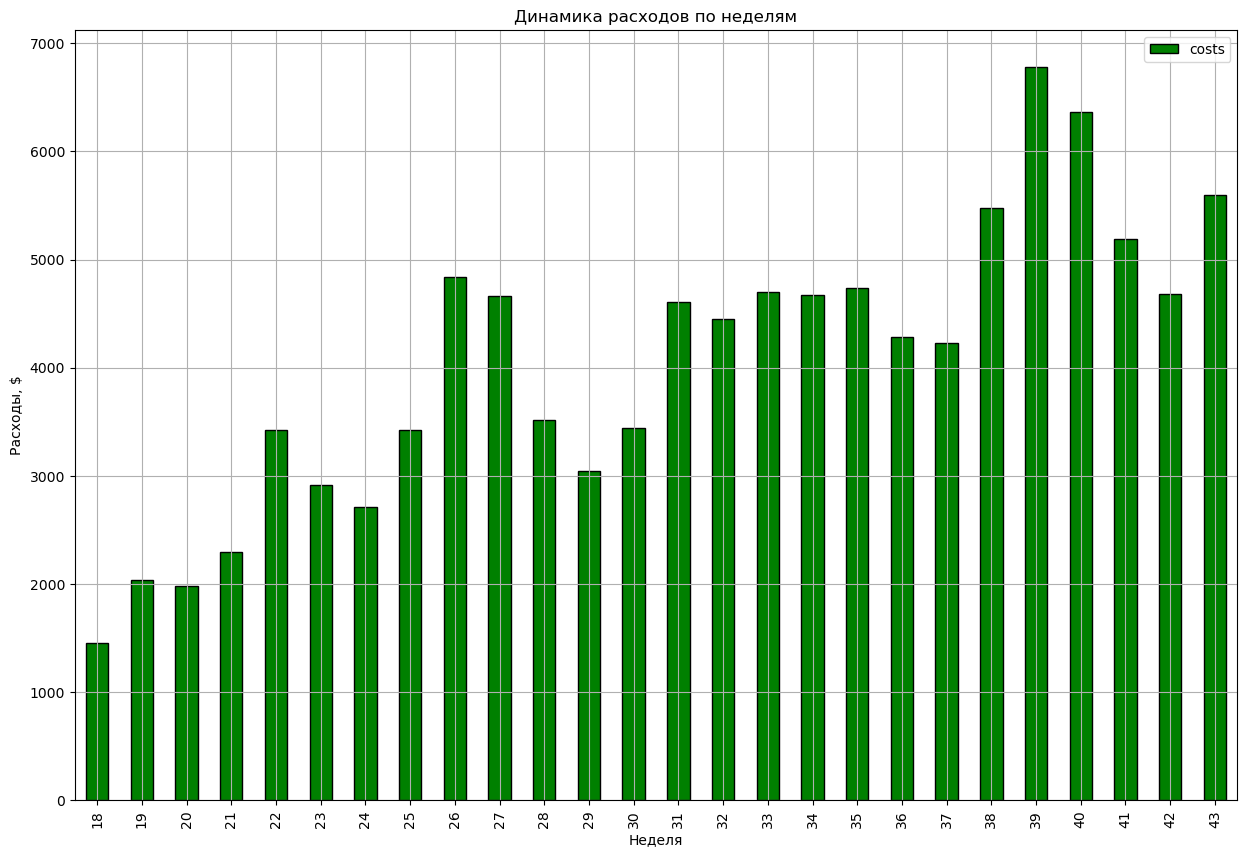

In [46]:
week_costs.plot(kind='bar', grid=True, color='green', edgecolor='black', figsize=(15, 10))
plt.title('Динамика расходов по неделям')
plt.xlabel('Неделя')
plt.ylabel('Расходы, $')
plt.show()

##### Динамика расходов на маркетинг по месяцам

In [47]:
costs['month'] = costs['dt'].dt.month

In [48]:
month_channel_costs = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')

In [49]:
month_costs = costs.groupby('month').agg({'costs': 'sum'})

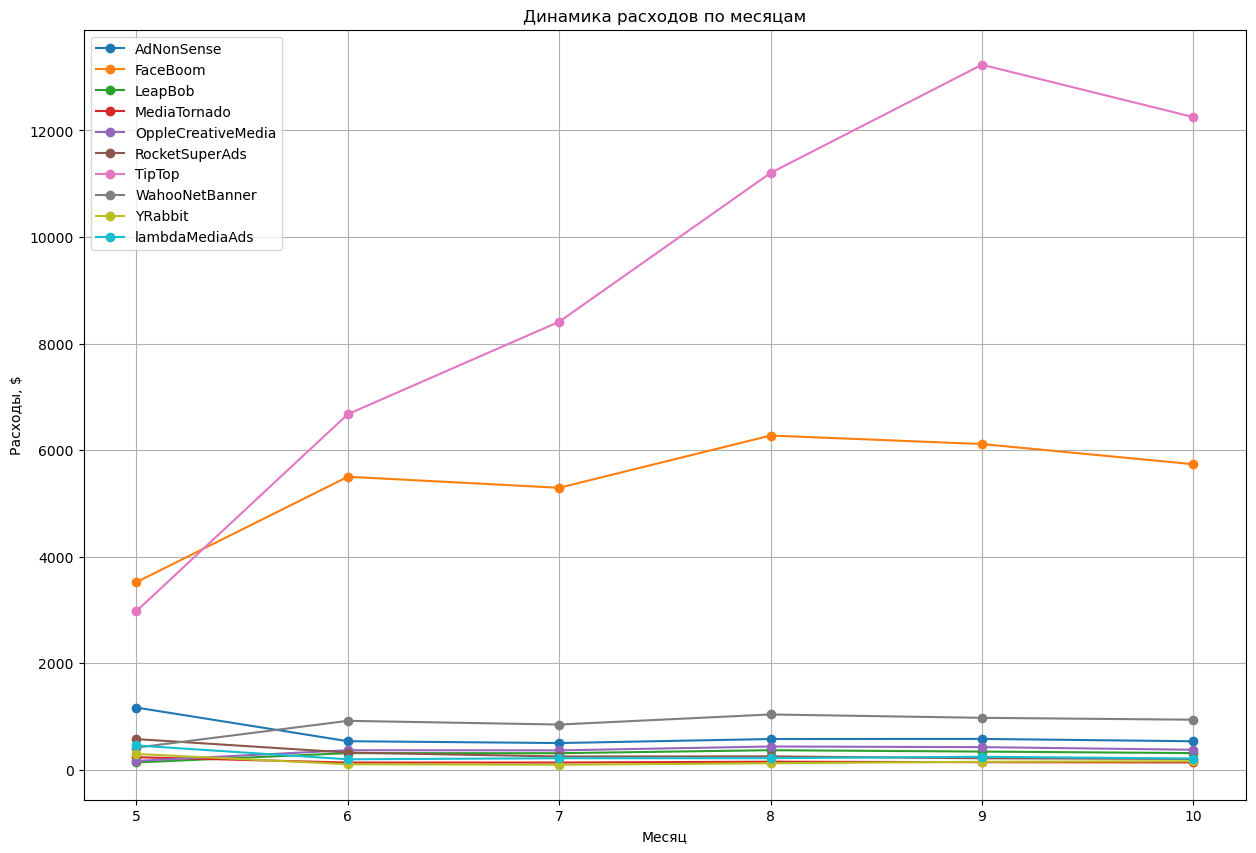

In [50]:
plt.figure(figsize=(15, 10))

for column in month_channel_costs.columns:
    plt.plot(month_channel_costs.index, month_channel_costs[column], label=column, marker='o')

plt.title('Динамика расходов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Расходы, $')
plt.legend()
plt.grid()

plt.show()

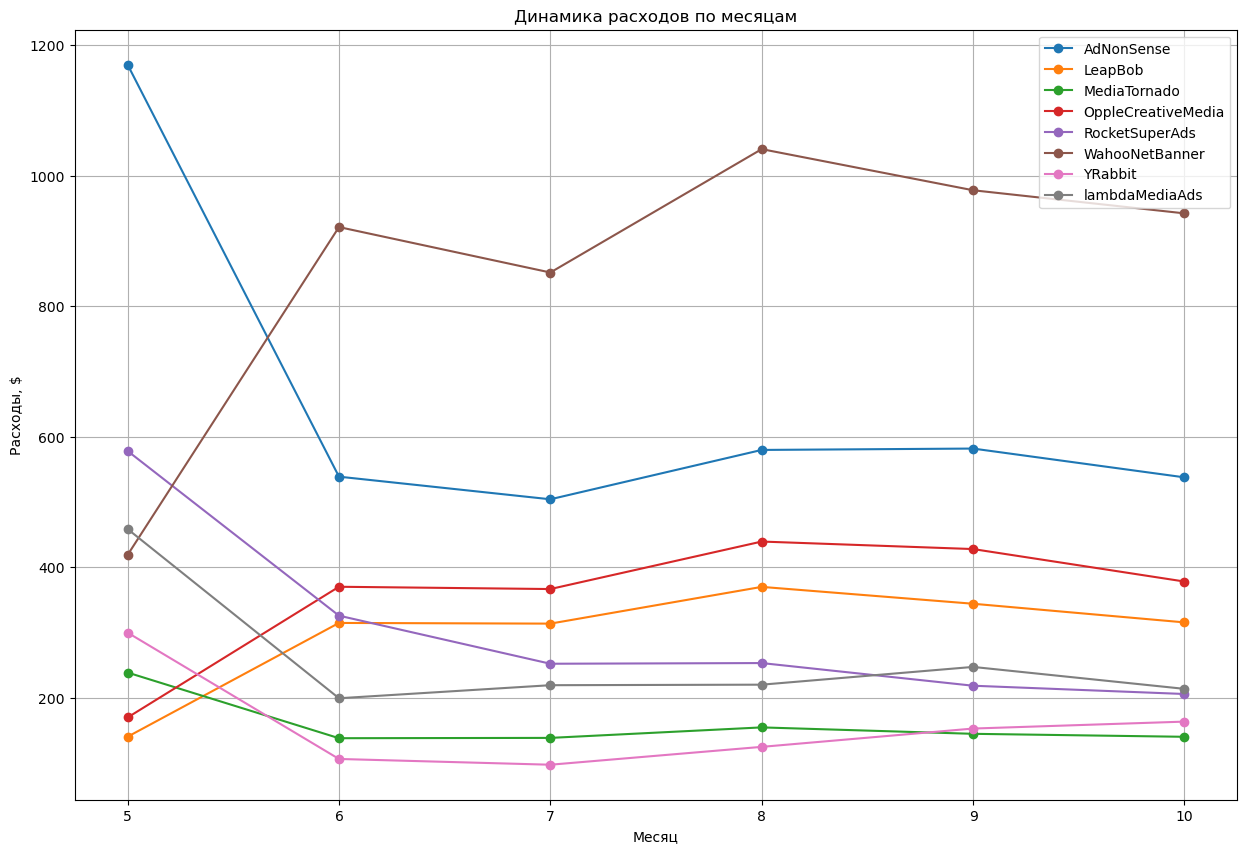

In [51]:
plt.figure(figsize=(15, 10))

for column in month_channel_costs.columns:
    if column != 'TipTop' and column != 'FaceBoom':
        plt.plot(month_channel_costs.index, month_channel_costs[column], label=column, marker='o')

plt.title('Динамика расходов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Расходы, $')
plt.legend()
plt.grid()

plt.show()

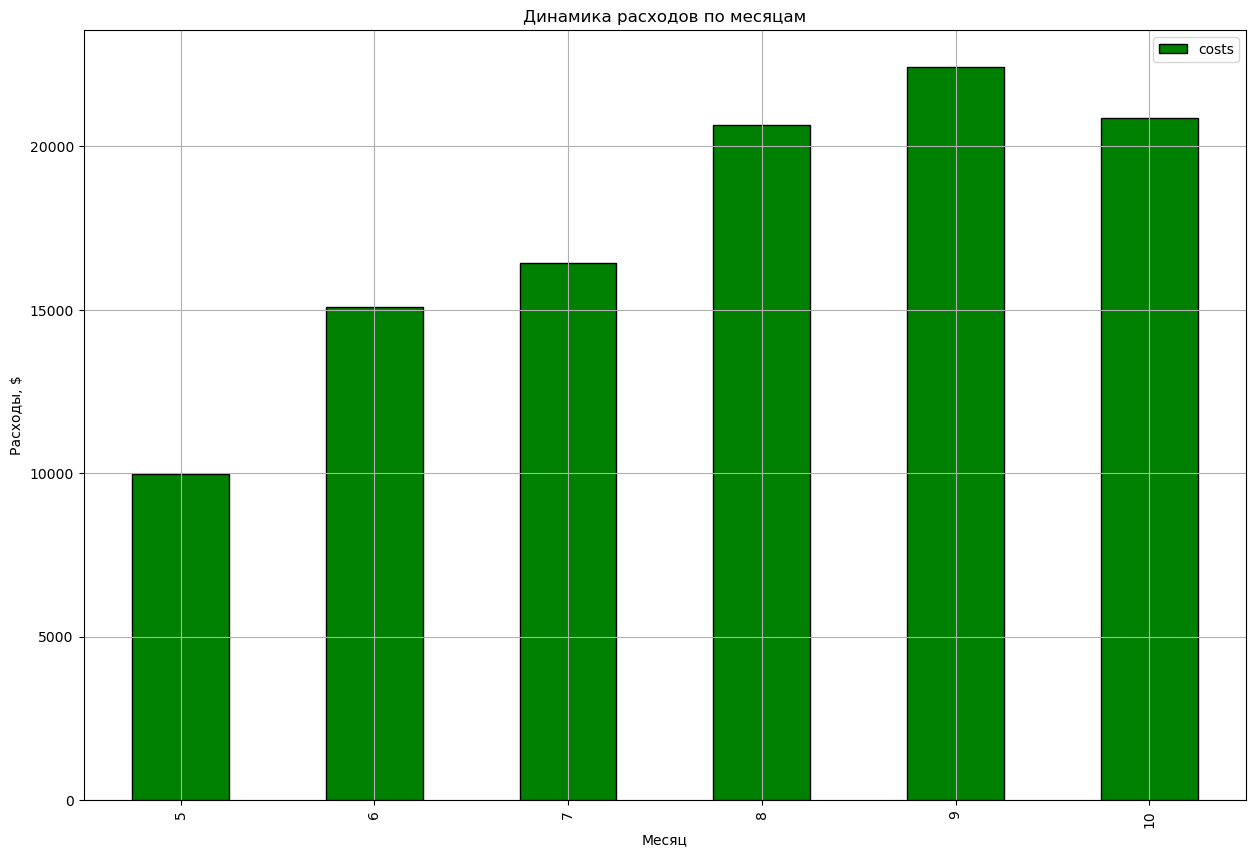

In [52]:
month_costs.plot(kind='bar', grid=True, color='green', edgecolor='black', figsize=(15, 10))
plt.title('Динамика расходов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Расходы, $')
plt.show()

1. Затрыты на маркетинг по неделям

- Относительно начала периода исследования мы видим, что каждую неделю общие затраты на маркетинг увеличивались. В начале расходы не превышали 2000, однако, к концу последней недели они составляют более 5000.

- Рассматривая затраты на маркетинг по канал привлечения пользователей по неделям мы видим, что в основном деньги расходовались на **TipTop** и **FaceBoom**. Пик расходов пришелся на 39 неделю, на **TipTop** компания потратила около 4000, а на **FaceBoom** около 2000. У остальных каналов расходы не превышали 200, если оценивать динамику затрат на эти каналы, то затраты в основном увеличивались, но на каналы **AdNonSense**, **RocketSuperAds**, **lambdaMediaAds**, **YRabbit** и **MediaTornado** наоборот уменьшались.

2. Затраты на маркетинг по месяцам

- Общие затраты на маркетинг увеличивались и достигли пика на 9-ый месяц, но затем компания уменьшила расходы. Такая же ситуация и по затратам отдельно на каналы, больше всего средств уходило на **TipTop** и **FaceBoom**. Если рассматривать более мелкие источники, то мы видим, что на них затраты снижались, а на **WahooNetBanner**, **OppleCreativeMedia** и **LeapBob** увеличивались.



#### Средняя стоимость привлечения пользователя (CAC)

In [53]:
user_cost = (profiles.
             groupby('channel').
             agg({'acquisition_cost': 'mean'}).
             sort_values(by='acquisition_cost', ascending=False))
user_cost

acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172
organic                     0.000000

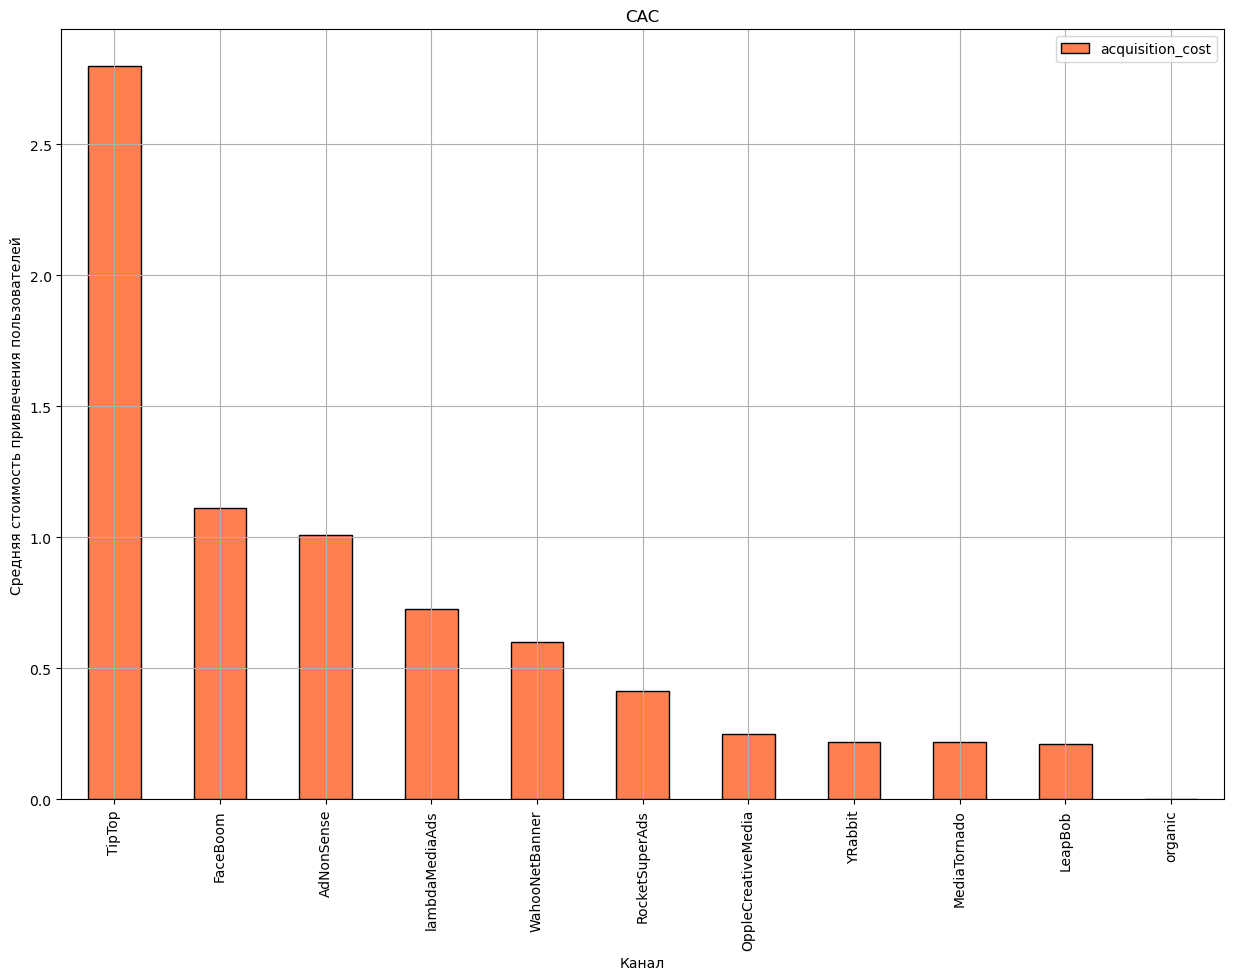

In [54]:
user_cost.plot(kind='bar', grid=True, color='coral', edgecolor='black', figsize=(15, 10))
plt.title('CAC')
plt.xlabel('Канал')
plt.ylabel('Средняя стоимость привлечения пользователей')
plt.show()

Средняя стоимость привлечения пользователей у канала **TipTop** составляет 2.8, что является самым большим значением. Затем идут каналы: **FaceBoom** (1.11) и **AdNonSense** (1.008). У остальных каналов средняя стоимость привлечения пользователей не превышает 1.

Однако, если вернуться к анализу доли платящих пользователей, то на первом месте канал **FaceBoom**, поэтому стоит обратить внимание на завышенный CAC канала TipTop.

**Промежуточный вывод по шагу 4**

1. Общая сумма расходов на маркетинг составляет: 105497.3$. Из них компания больше всего тратит на TipTop - 54751,30 (51,9 от общей суммы расходов) и на FaceBoom - 32445,60 (30,8% от общей суммы расходов).


2. Затрыты на маркетинг по неделям
- Относительно начала периода исследования мы видим, что каждую неделю общие затраты на маркетинг увеличивались. В начале расходы не превышали 2000, однако, к концу последней недели они составляют более 5000. 
- Рассматривая затраты на маркетинг по каналам привлечения пользователей по неделям мы видим, что в основном деньги расходовались на TipTop и FaceBoom. Пик расходов пришелся на 39 неделю, на TipTop компания потратила около 4000, а на FaceBoom около 2000. У остальных каналов расходы не превышали 200, если оценивать динамику затрат на эти каналы, то затраты в основном увеличивались, но на каналы AdNonSense, RocketSuperAds, lambdaMediaAds, YRabbit и MediaTornado наоборот уменьшались.

3. Затраты на маркетинг по месяцам
- Общие затраты на маркетинг увеличивались и достигли пика на 9-ый месяц, но затем компания уменьшила расходы. Такая же ситуация и по затратам отдельно на каналы, больше всего средств уходило на TipTop и FaceBoom. Если рассматривать более мелкие источники, то мы видим, что на них затраты снижались, а на WahooNetBanner, OppleCreativeMedia и LeapBob увеличивались.

4. Средняя стоимость привлечения пользователей у канала TipTop составляет 2.8, что является самым большим значением. Затем идут каналы: FaceBoom (1.11) и AdNonSense (1.008). У остальных каналов средняя стоимость привлечения пользователей не превышает 1.

- Однако, если рассматривать доли платящих пользователей, то на первом месте канал FaceBoom, поэтому стоит обратить внимание на завышенный CAC канала TipTop.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

Установим момент и горизонт анализа данных. Предположим, что на календаре 1 ноября 2019 года, и зададим двухнедельный горизонт анализа.

In [55]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

#### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

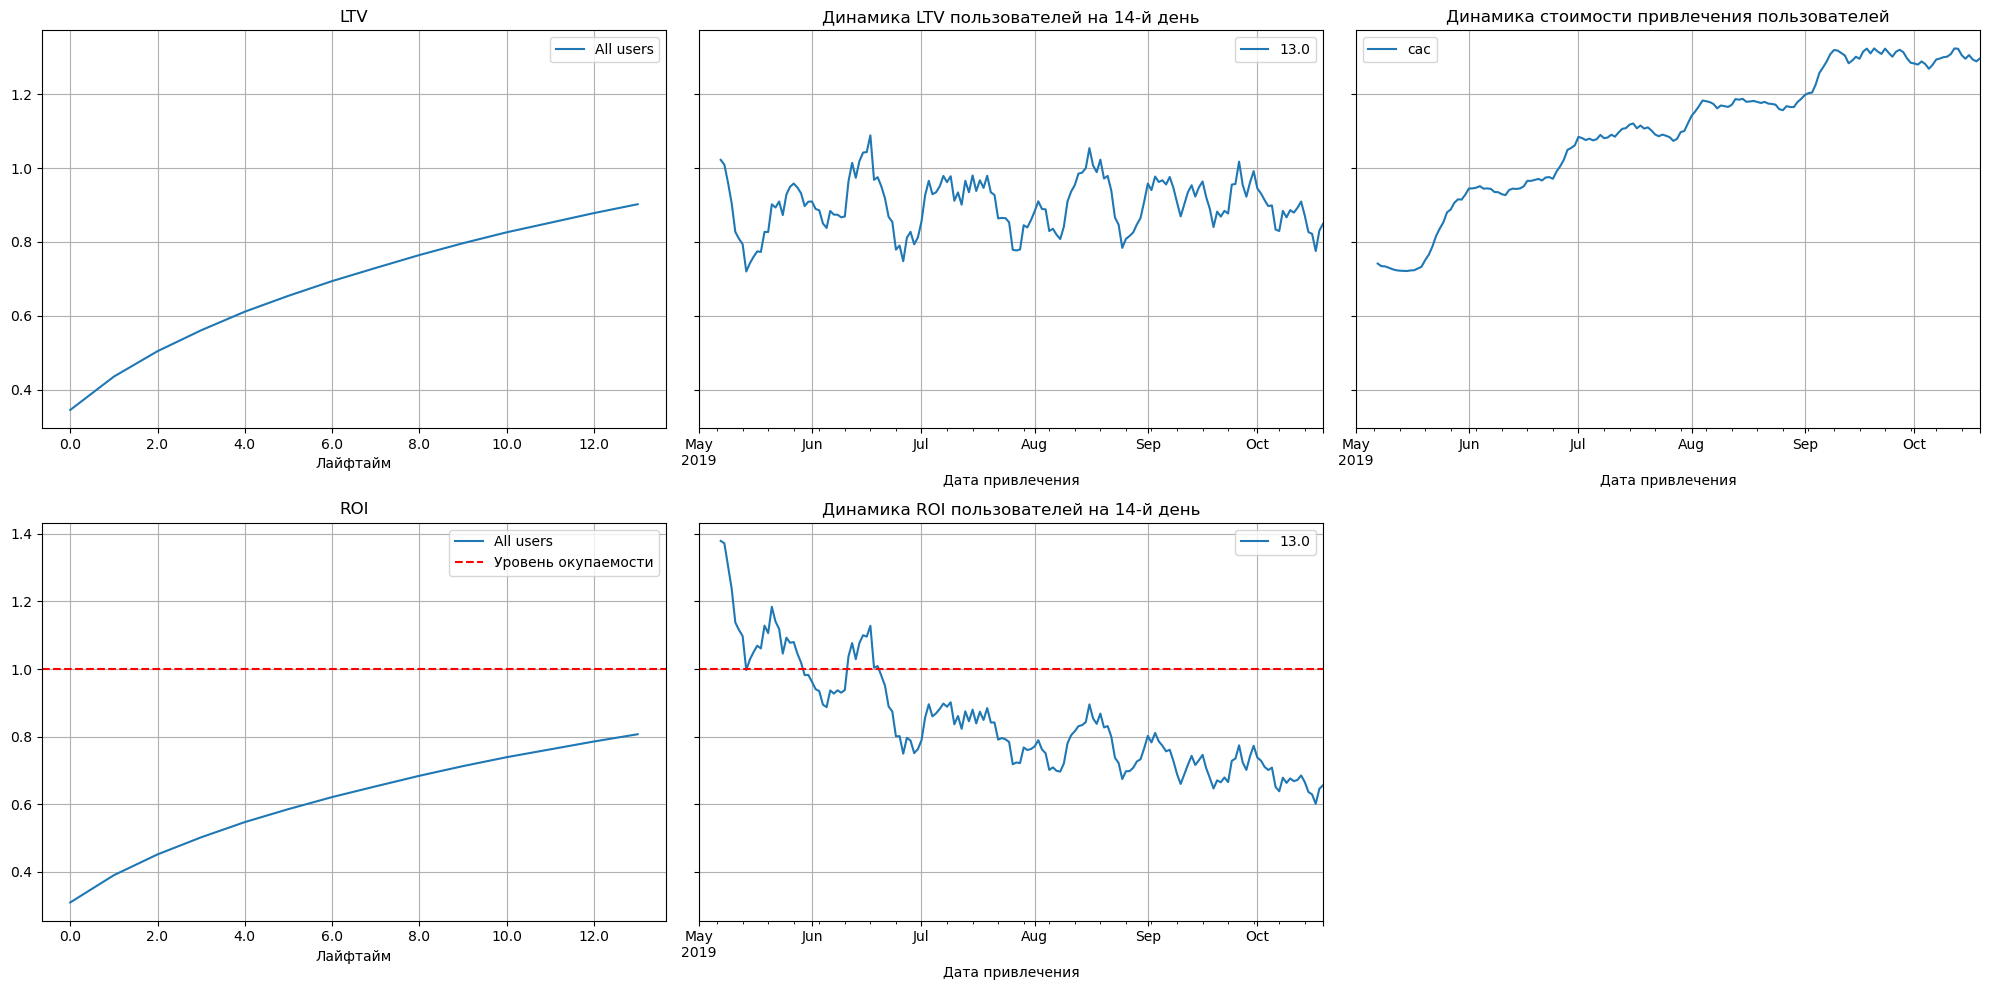

In [56]:
# уберем органических пользователей
profiles = profiles.query('channel != "organic"')

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, purchases, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Из полученных графиков можем сделать следующие выводы:

- Реклама не окупается, если рассматривать динамику, то можем заметить, что с серидины июня окупаемость имеет резкий скачок вниз. 

- Также с серидины мая мы можем наблюдать стремительный рост стоимости привлечения пользователей.

- LTV стабильно растет на протяжении периода исследования.

#### Проверим конверсию  и удержание пользователей и динамику их изменения. 

##### Конверсия и удержание пользователей

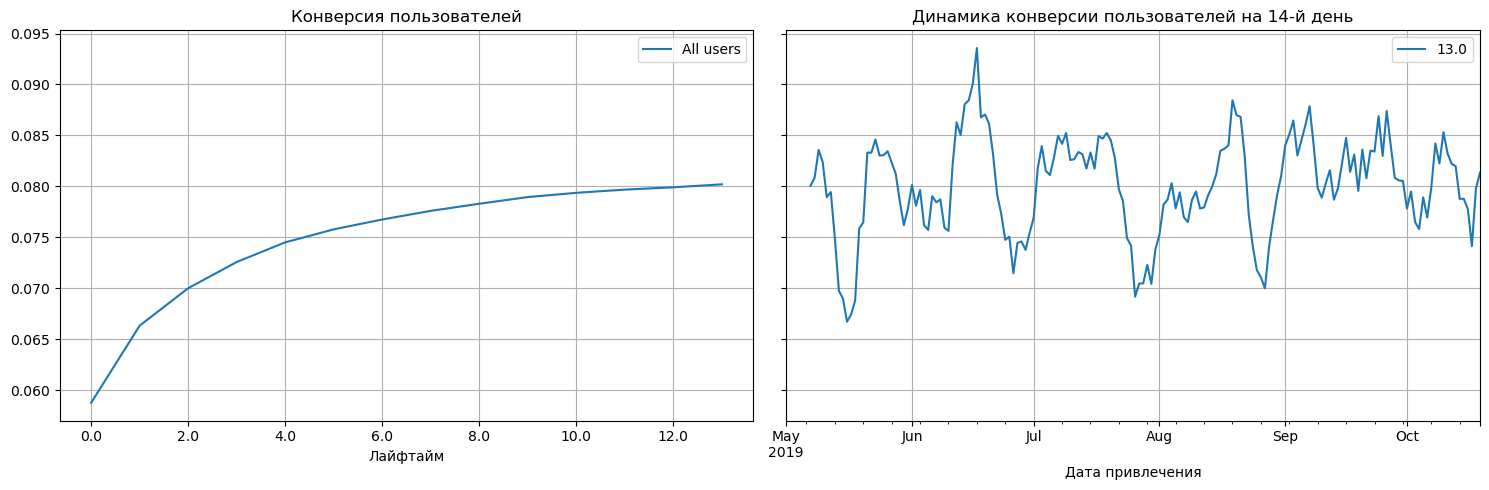

In [57]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, purchases, observation_date, horizon_days
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

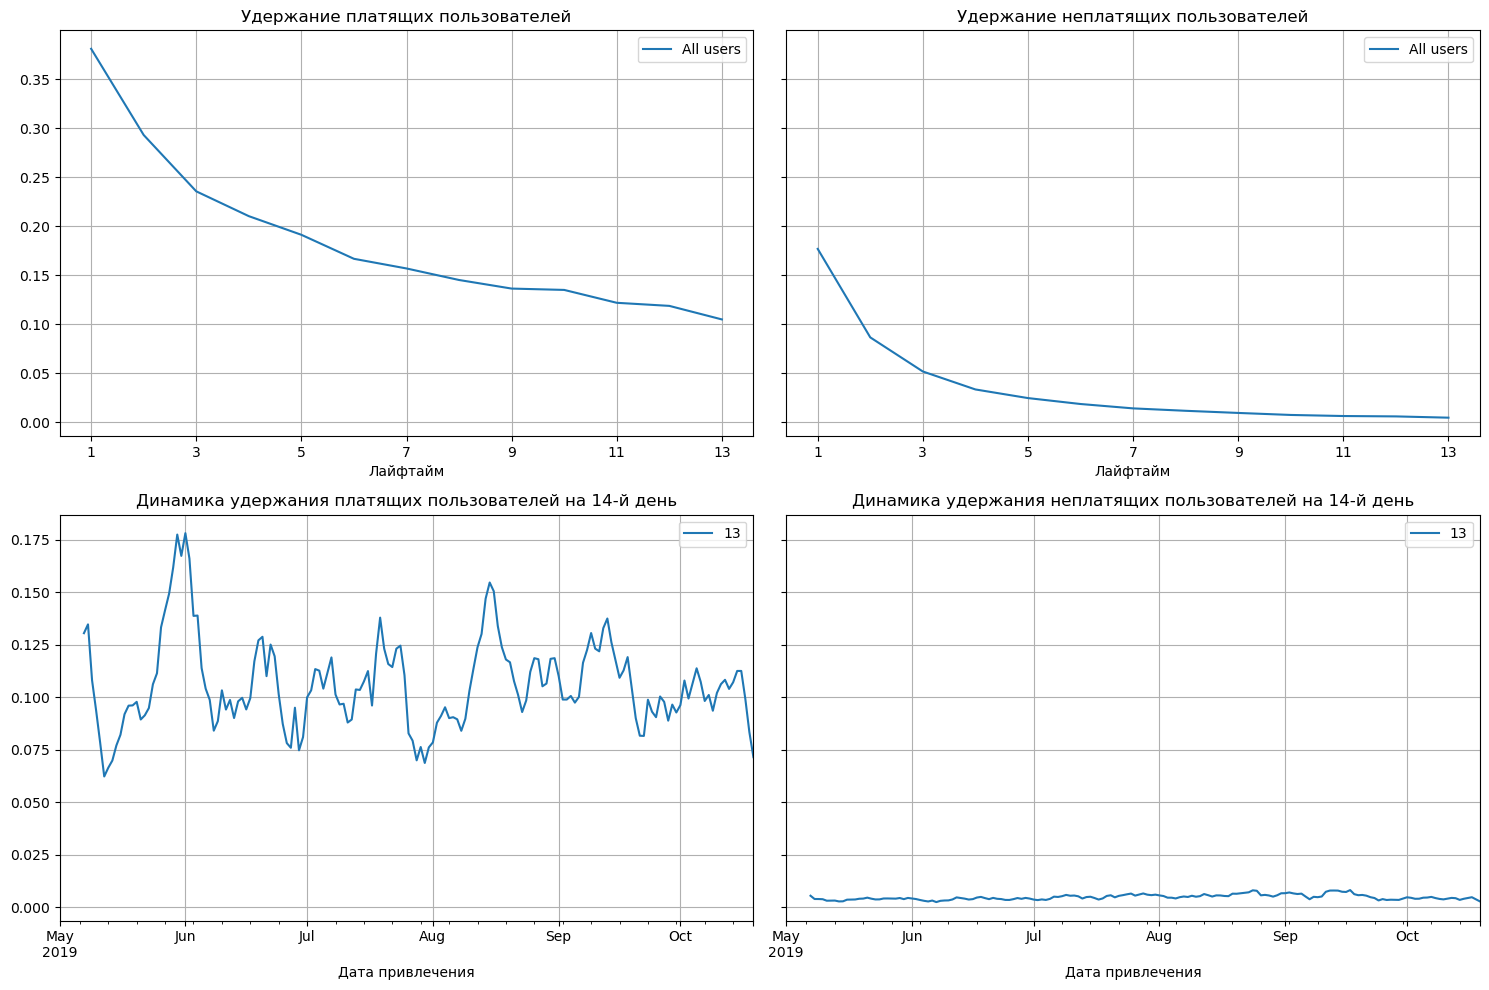

In [58]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

1. Конверсия

- График с информацией о конверсии пользователей дает понять, что пользователе легко конвертируются в первые 4 дня, но затем темпы конверсии замедляются.

- Рассматривая динамику конверсии по месяцам можем сделать вывод о том, что в мае была резкая просадка показателя, возможно, пользователи привлеченные в мае сталкивались с трудностями, связанными с использованием приложения, или в этот месяц рекламная компания была проведена не лучшим образом.

2. Удержание

- Видим, что платящие пользователи удерживаются намного лучше, чем неплатящие. Если рассматривать по дням, то на 14 день удержание платящих пользователей составляет около 10%, а не платящих около 1%. Динамика по месяцам довольно удручающая, так как для неплатящих пользователей она почти отсутствует.

- Возможно, для платящих пользователей предусмотрены специальные функции, которые крайне положительно сказываются на желании использовать приложение Procrastinate Pro+.

##### Конверсия и удержание пользователей по странам

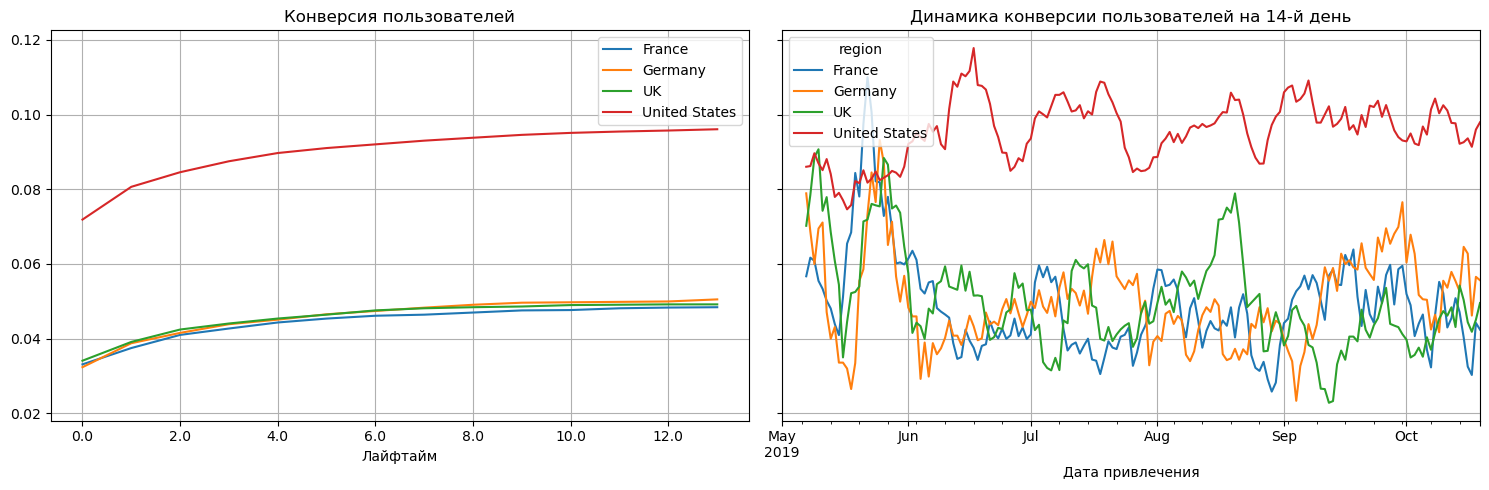

In [59]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, purchases, observation_date, horizon_days, dimensions=['region']
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

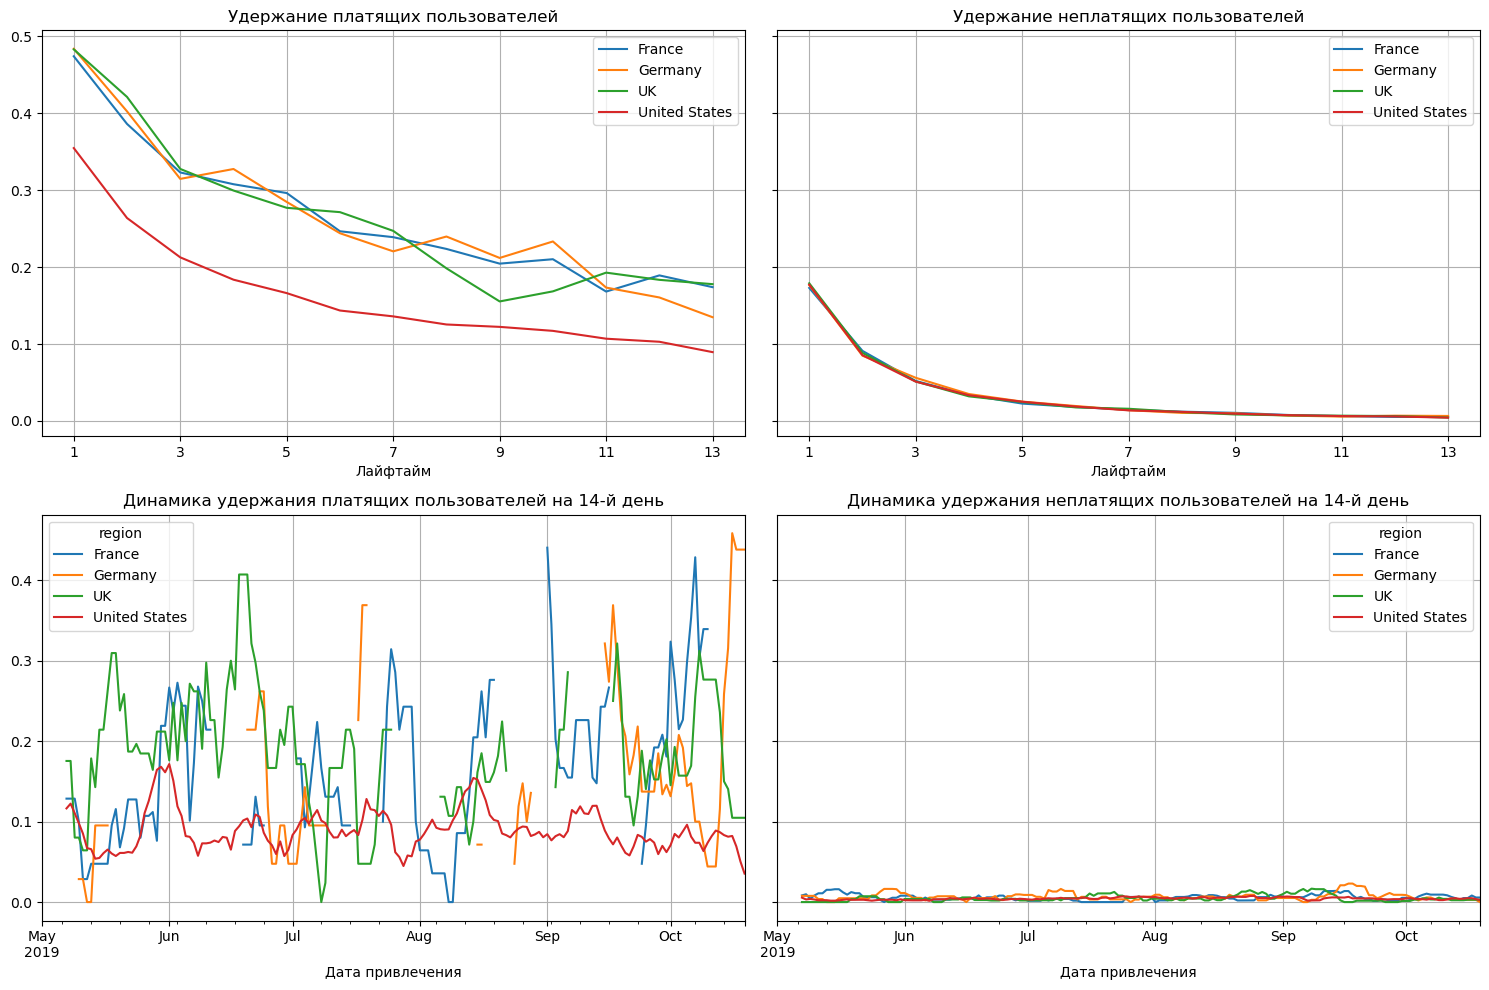

In [60]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

1. Конверсия

- Видим, что пользователи из США намного лучше конвертируются, чем пользователе из других стран.

- Если рассматривать динамику конверсии по месяцам, то стоит отметить, что в мае произошло резкое увеличение конверсии для пользователей из Франции, Германии и Великобритании, а для пользователей из США ситуация ухудшилась. 

2. Удержание

- Видим, что платящие пользователи из США удерживаются намного хуже, чем платящие пользователи из других стран. Однако, если рассматривать динамику удержания, то ситуация с пользователями из США более стабильна, чем для пользователей из других стран, так как мы видим, что линии графика прерываются.

- Ситуация с удержанием неплатящих пользователей намного хуже. В этом случае удержание неплатящих пользователей для всех стран имеет крайне низкие показатели. 

##### Конверсия и удержание пользователей по устройствам

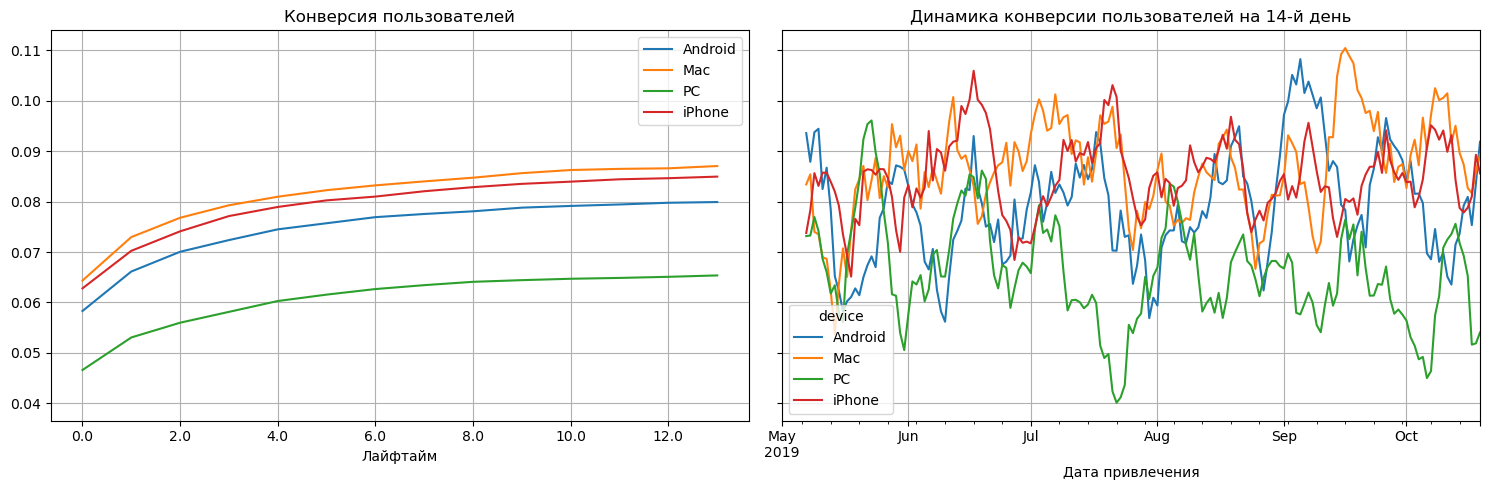

In [61]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, purchases, observation_date, horizon_days, dimensions=['device']
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

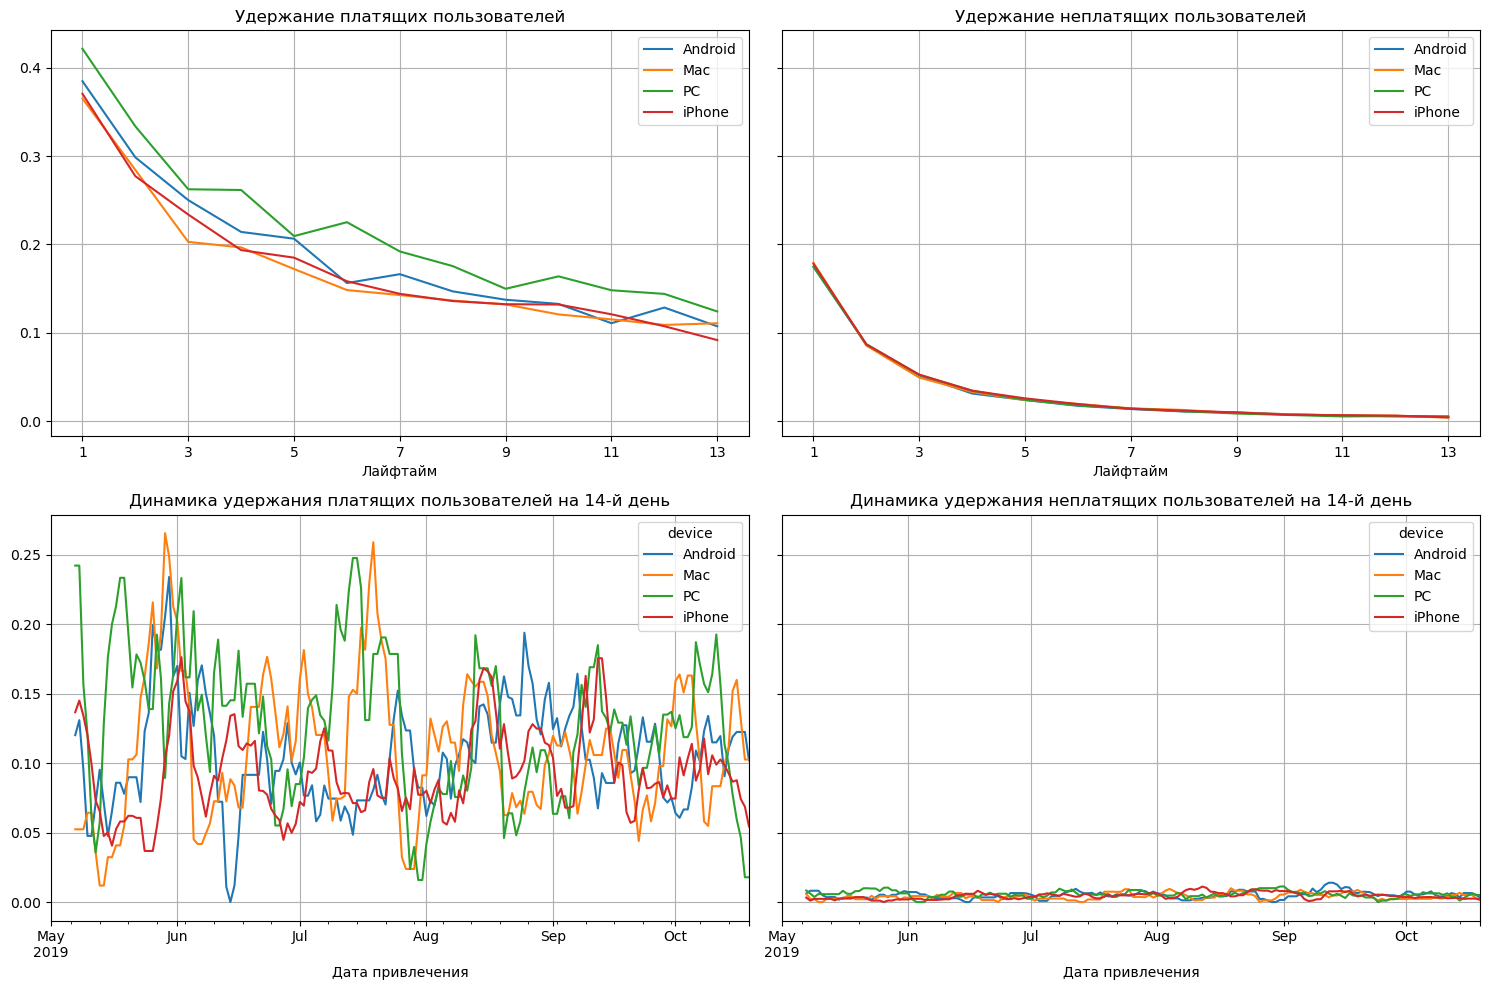

In [62]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

1. Конверсия

- Пользователи, которые используют PC конвретируются хуже, чем дургие, мы можем увидеть, что с середины мая произошли изменения, которые привели к тому, что конверсия для пользователей PC начала стремительно снижаться, а для пользователей других устройств наоборот увеличиваться.

2. Удержание 

- Неплатящие пользователи всех устройств удерживаются  одинаково плохо. 

- Лучше всех удерживаются платящие пользователи PC, ситуация для остальных устройств примерно схожая. 

##### Конверсия и удержание пользователей по каналам 

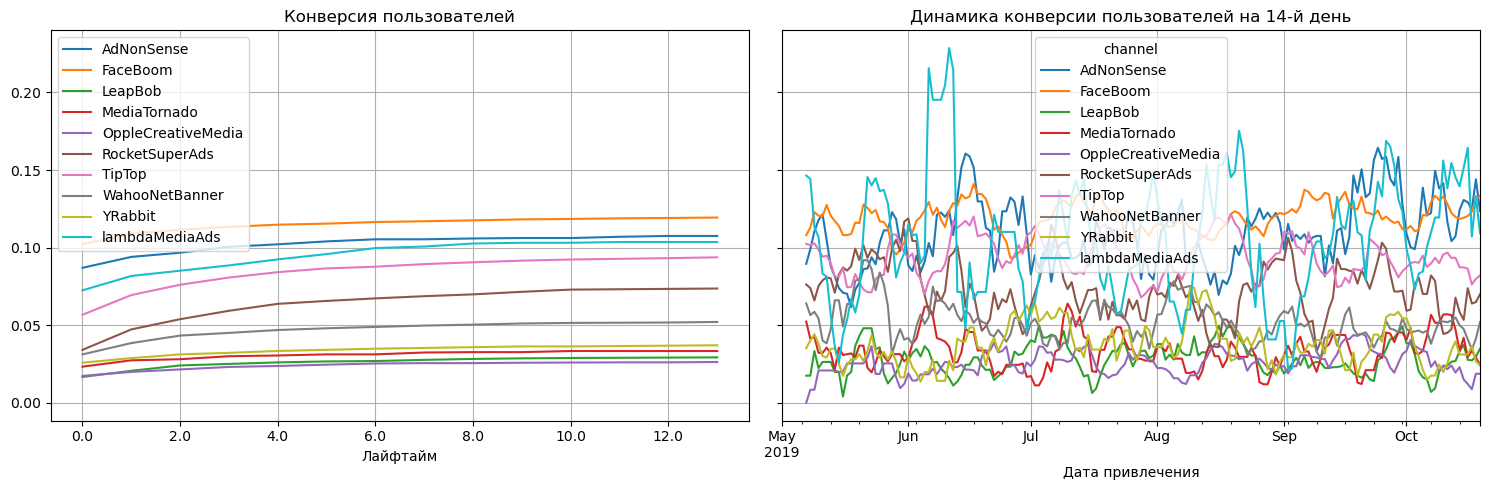

In [63]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, purchases, observation_date, horizon_days, dimensions=['channel']
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

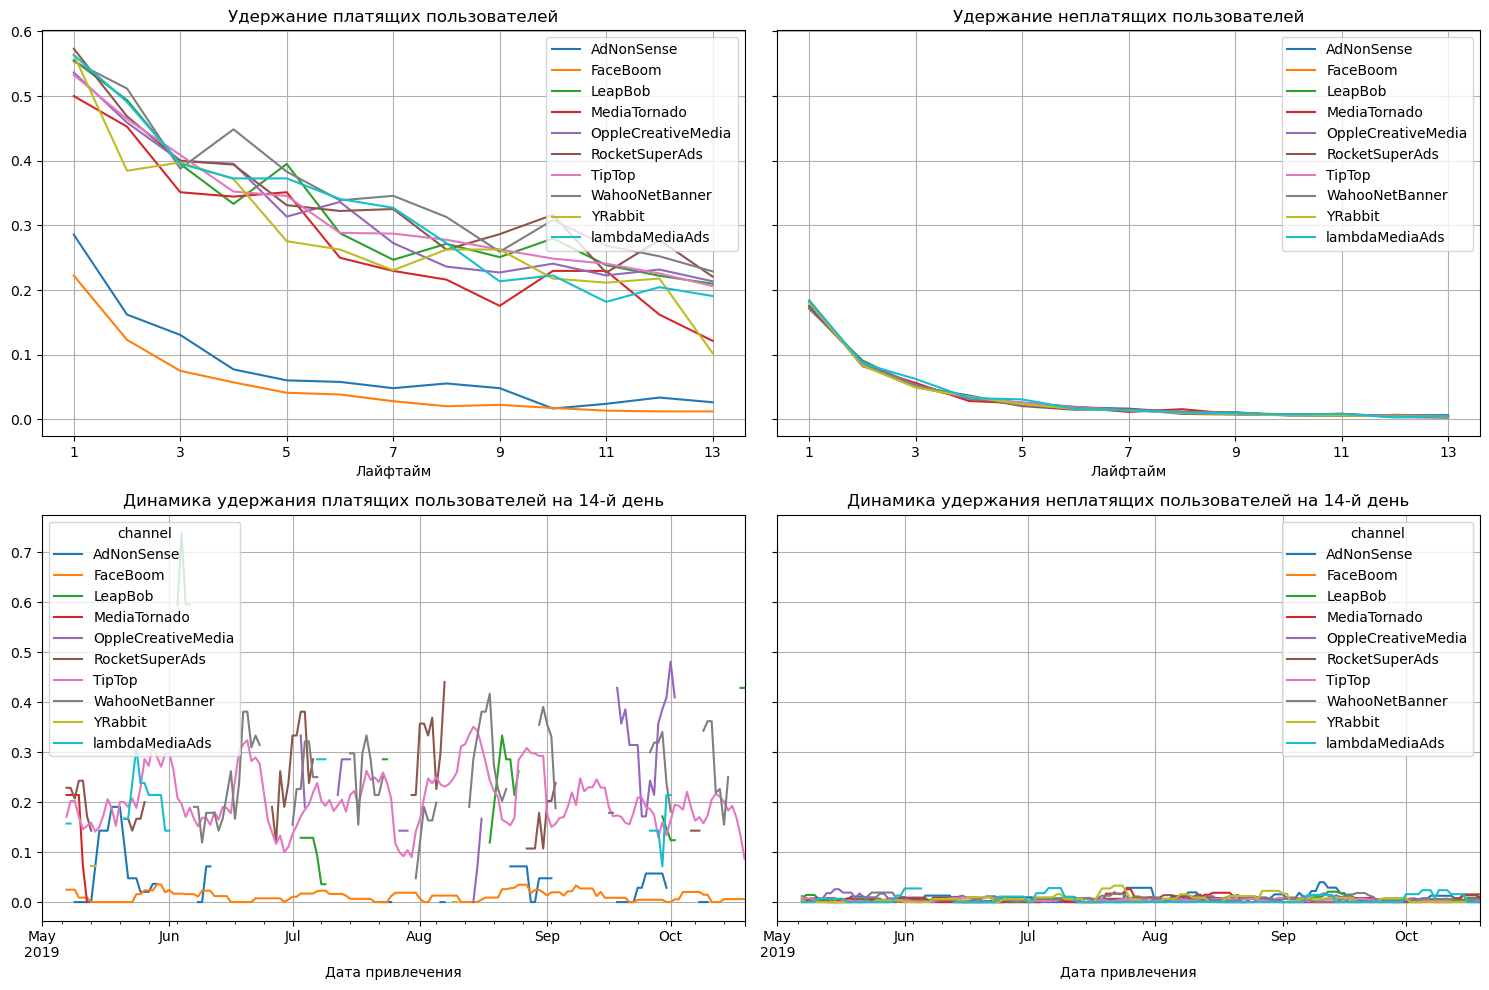

In [64]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

1. Конверсия

- Лучше всех конвертируются пользователи, которые пришли через канал **FaceBoom**, далее идут пользователи **AdNonSense** и **LambdaMediaAds**. Рассматривая динамику конверсии, мы можем увидеть, что в середине мая были изменения в рекламной компании или приложении, которые привели к общему снижению конверсии для всех каналов, особенно для LambdaMediaAds.

2. Удержание 

- Хуже всех удерживаются платящие пользователи, которые пришли через каналы AdNonSense и FaceBoom. В динамике данный показатель говорит нам о том, что платящие пользователи FaceBoom имеют довольно низкий показатель удержания. 

- Неплатящие пользователи почти не задерживаются в приложении.

#### Проанализируем окупаемость рекламы с разбивкой по устройствам.

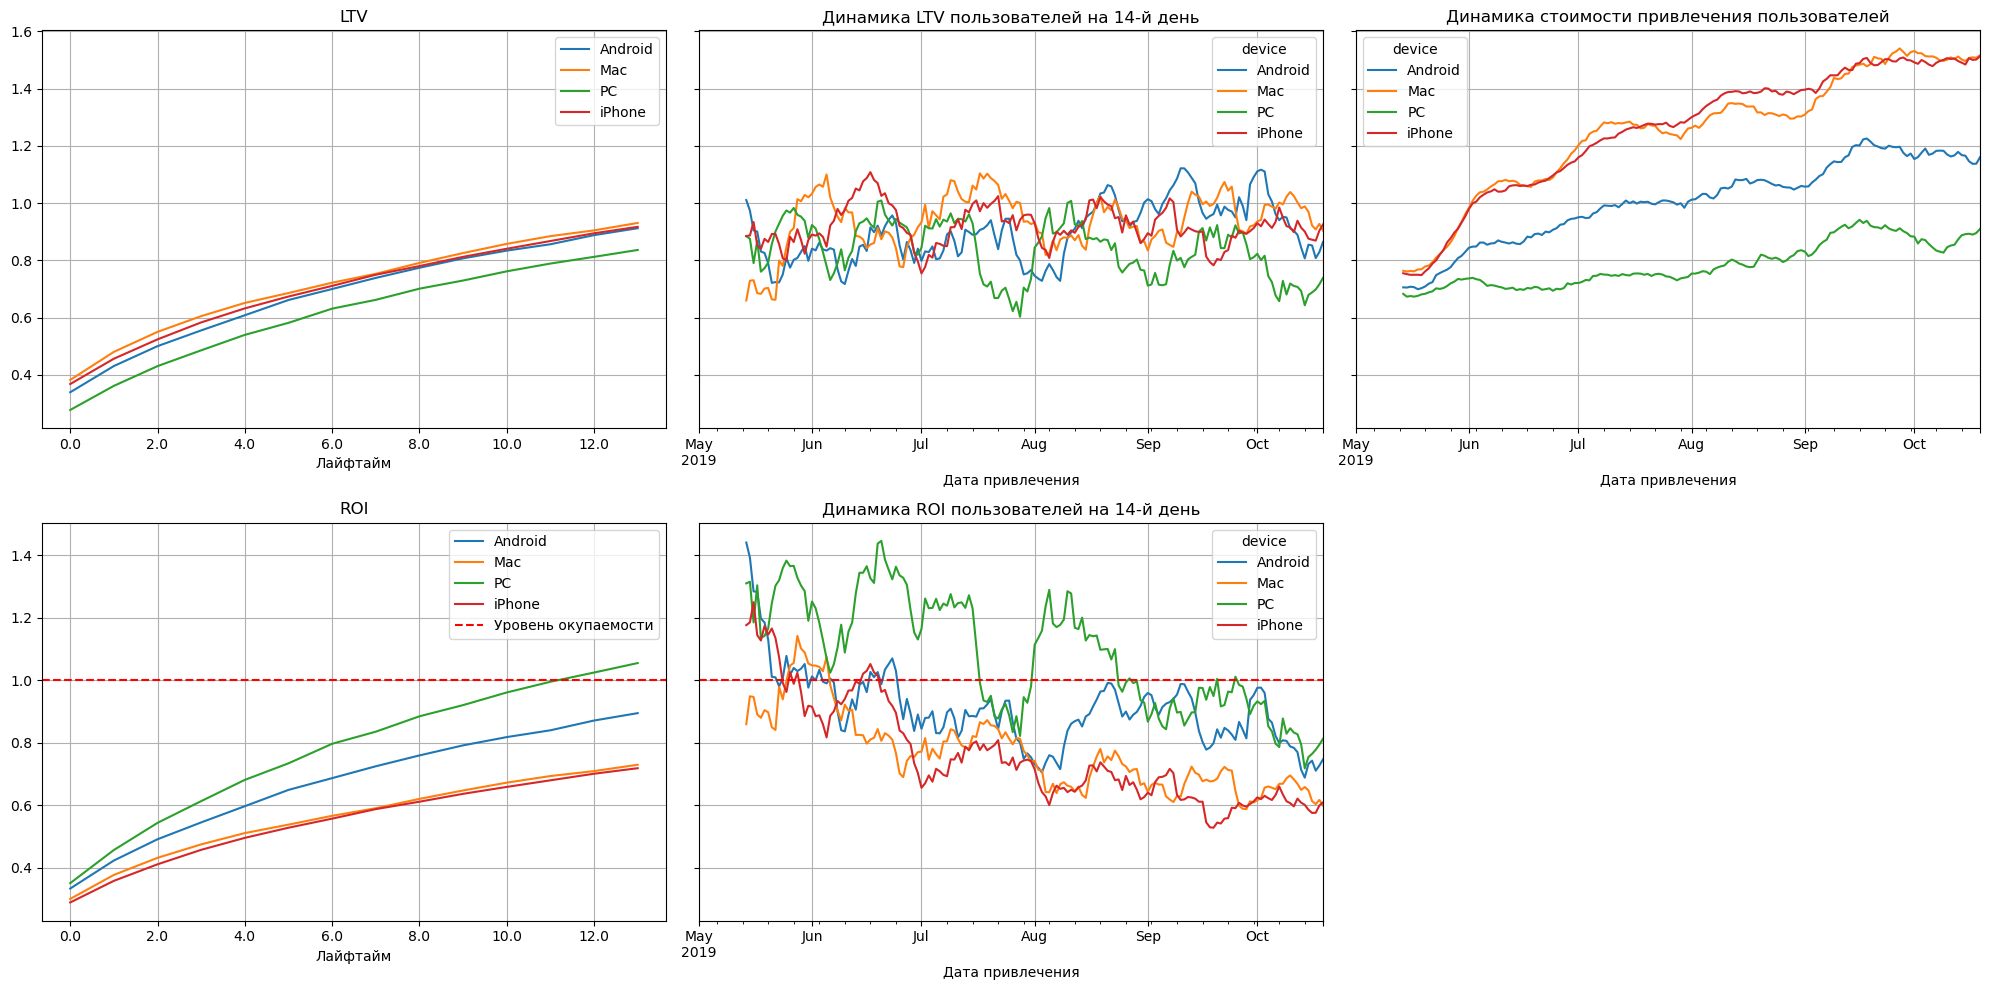

In [65]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, purchases, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

На основе таких показателей как LTV и ROI мы можем сделать следующие выводы:

- Пожизненная ценность клиентов, использующих PC, самая низкая, остальные устройства имеют примерно одинаковый показатель.

- Если посмотреть на стоимость привлечения пользователей, то мы видим, что резкий рост данного показателя характерен пользователям Mac и Iphone. Затрыты на пользователей PC самые низкие.

- В итоге реклама окупается только для пользователей PC. Динамика ROI показывает, что до середины мая окупались все пользователе, но после этого видим спад данного показателя для всех пользователей, кроме Mac. Также пользователи PC окупались дольше всех, под конец августа все пользователи перестали окупаться. 

#### Проанализируем окупаемость рекламы с разбивкой по странам.

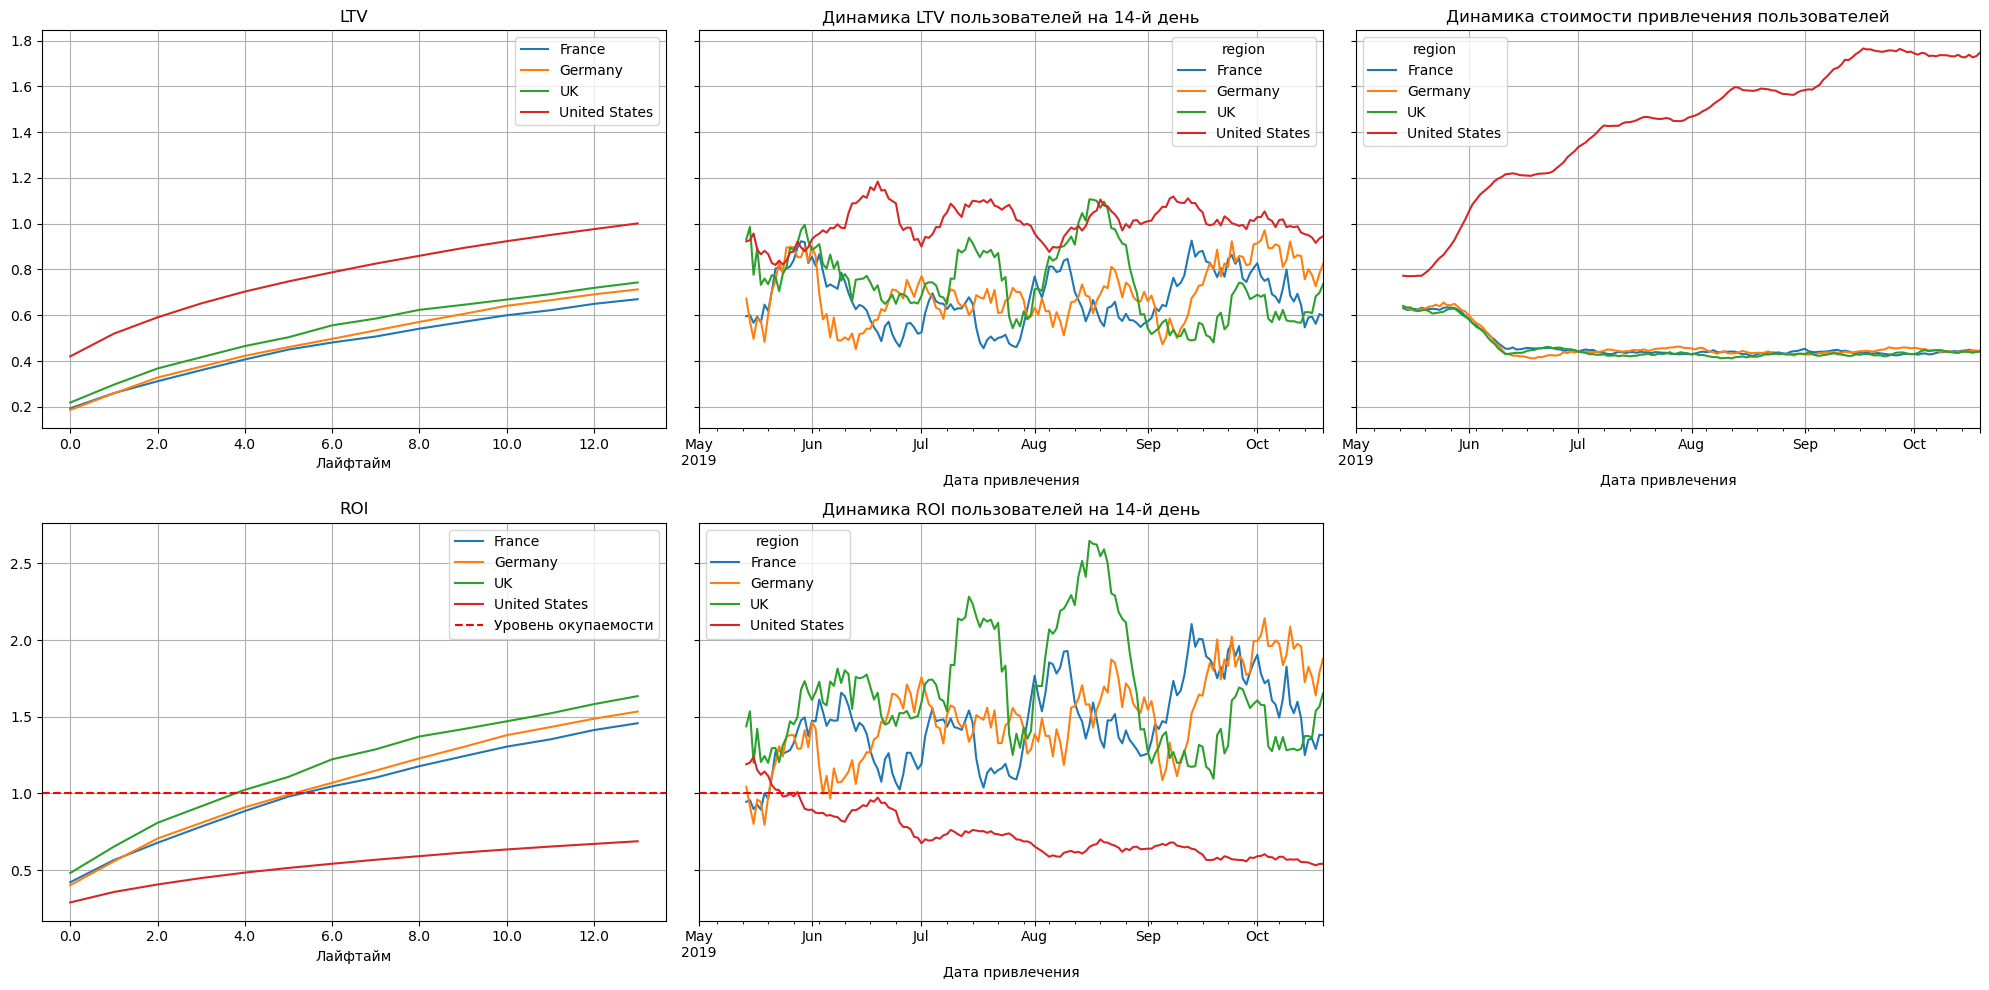

In [66]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, purchases, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- LTV всех пользователей стабильно растет, для пользователей из США показатель самый высокий, для других стран ситуация примерно одинаковая. В динамике видим, что ситуация с LTV стабильна только для пользователей США, а у других стран присутсвуют резкие скачки. 

- Стоимость привлечения пользователей растет только для пользователей из США, а для других падает, но ситуация с окупаемостью дает понять, что стратегия неверная, так как единственные кто не преодолевают уровень окупаемости - это пользователи из США. В динамике видим, что начиная с середины мая пользователи всех стран, кроме США, стабильно окупались.

#### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам

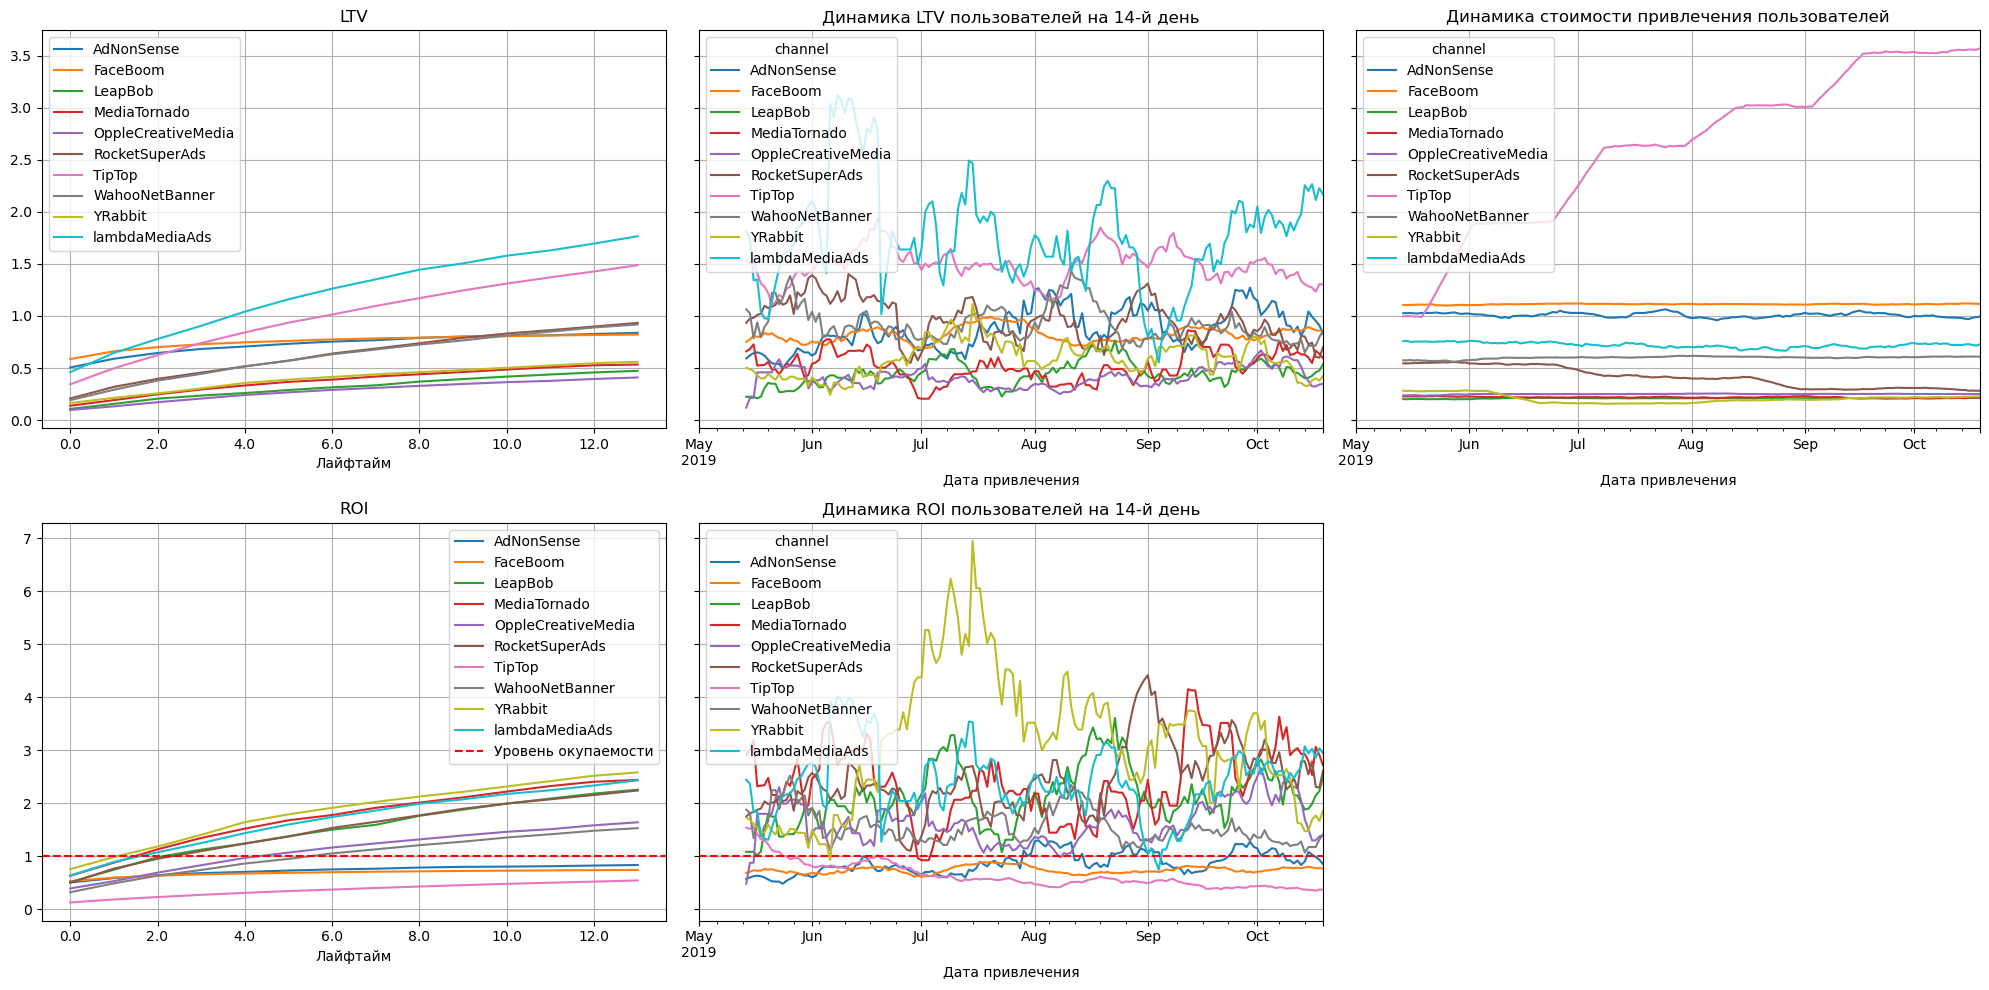

In [67]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, purchases, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

LTV стабильно растет для всех каналов привлечения пользователей, выделяются **LambdaMediaAds** и **TipTop**. Но динамика стоимости привлечения пользователей говорит на о том, что больше всего средств компания расходует на пользователей из **TipTop**. Исходя из этого мы видим, что пользователи **TipTop** не окупаются на протяжении всего периода исследования, такая же ситуация с пользователями из **FaceBoom** и **LambdaMediaAds**.

**Промежуточный вывод по шагу 5**
1. Общие данные по рекламе

- Реклама не окупается, если рассматривать динамику, то можем заметить, что с серидины июня окупаемость имеет резкий скачок вниз. Также с серидины мая мы можем наблюдать стремительный рост стоимости привлечения пользователей. LTV стабильно растет на протяжении периода исследования.



2. Общие данные по конверсии и удержанию пользователей

- График с информацией о конверсии пользователей дает понять, что пользователе легко конвертируются в первые 4 дня, но затем темпы конверсии замедляются. Рассматривая динамику конверсии по месяцам можем сделать вывод о том, что в мае была резкая просадка показателя, возможно, пользователи привлеченные в мае сталкивались с трудностями, связанными с использованием приложения, или в этот месяц рекламная компания была проведена не лучшим образом.

- Платящие пользователи удерживаются намного лучше, чем неплатящие. Если рассматривать по дням, то на 14 день удержание платящих пользователей составляет около 10%, а не платящих около 1%. Динамика по месяцам довольно удручающая, так как для неплатящих пользователей она почти отсутствует. Возможно, для платящих пользователей предусмотрены специальные функции, которые крайне положительно сказываются на желании использовать приложение Procrastinate Pro+.


3. Окупаемость рекламы с разбивкой по устройствам

- Пользователи, которые используют PC конвретируются хуже, чем дургие, мы можем увидеть, что с середины мая произошли изменения, которые привели к тому, что конверсия для пользователей PC начала стремительно снижаться, а для пользователей других устройств наоборот увеличиваться. Неплатящие пользователи всех устройств удерживаются одинаково плохо. Лучше всех удерживаются платящие пользователи PC, ситуация для остальных устройств примерно схожая.

- Пожизненная ценность клиентов, использующих PC, самая низкая, остальные устройства имеют примерно одинаковый показатель. Если посмотреть на стоимость привлечения пользователей, то мы видим, что резкий рост данного показателя характерен пользователям Mac и Iphone. Затрыты на пользователей PC самые низкие. В итоге реклама окупается только для пользователей PC. Динамика ROI показывает, что до середины мая окупались все пользователе, но после этого видим спад данного показателя для всех пользователей, кроме Mac. Также пользователи PC окупались дольше всех, под конец августа все пользователи перестали окупаться.


4. Окупаемость рекламы с разбивкой по странам

- Пользователи из США намного лучше конвертируются, чем пользователе из других стран. Если рассматривать динамику конверсии по месяцам, то стоит отметить, что в мае произошло резкое увеличение конверсии для пользователей из Франции, Германии и Великобритании, а для пользователей из США ситуация ухудшилась. Платящие пользователи из США удерживаются намного хуже, чем платящие пользователи из других стран. Однако, если рассматривать динамику удержания, то ситуация с пользователями из США более стабильна, чем для пользователей из других стран, так как мы видим, что линии графика прерываются. Ситуация с удержанием неплатящих пользователей намного хуже. В этом случае удержание неплатящих пользователей для всех стран имеет крайне низкие показатели.

- LTV всех пользователей стабильно растет, для пользователей из США показатель самый высокий, для других стран ситуация примерно одинаковая. В динамике видим, что ситуация с LTV стабильна только для пользователей США, а у других стран присутсвуют резкие скачки. Стоимость привлечения пользователей растет только для пользователей из США, а для других падает, но ситуация с окупаемостью дает понять, что стратегия неверная, так как единственные кто не преодолевают уровень окупаемости - это пользователи из США. В динамике видим, что начиная с середины мая пользователи всех стран, кроме США, стабильно окупались.


5. Окупаемость рекламы с разбивкой по каналам

- Лучше всех конвертируются пользователи, которые пришли через канал FaceBoom, далее идут пользователи AdNonSense и LambdaMediaAds. Рассматривая динамику конверсии, мы можем увидеть, что в середине мая были изменения в рекламной компании или приложении, которые привели к общему снижению конверсии для всех каналов, особенно для LambdaMediaAds. Хуже всех удерживаются платящие пользователи, которые пришли через каналы AdNonSense и FaceBoom. В динамике данный показатель говорит нам о том, что платящие пользователи FaceBoom имеют довольно низкий показатель удержания. Неплатящие пользователи почти не задерживаются в приложении.

- LTV стабильно растет для всех каналов привлечения пользователей, выделяются LambdaMediaAds и TipTop. Но динамика стоимости привлечения пользователей говорит на о том, что больше всего средств компания расходует на пользователей из TipTop. Исходя из этого мы видим, что пользователи TipTop не окупаются на протяжении всего периода исследования, такая же ситуация с пользователями из FaceBoom и LambdaMediaAds.

# Вывод
Предоставленные нам данные не имеют критических замечаний. В датасете с информацией о визитах содержится 309901 запись, пропусков и дубликатов в данных нет. Стоит обратить внимания на названия столбцов. Датасет о заказах содержит 40212 записей. Данные не содержат пропусков и дубликатов. Стоит также обратить внимание на названия столбцов
Датасет о расходах содержит 1800 записей. Данные о расходах представлены корректно, пропусков и дубликатов нет, но также стоит обратить внимание на названия столбцов.

В ходе исследования были сделаны следующие выводы:

- Реклама в целом не окупается. С середины июня наблюдается резкий спад окупаемости, а с середины мая заметен стремительный рост стоимости привлечения пользователей.


1. Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

    - Устройства: На пользователей  Mac и Iphone тратится большая часть денежных средств, однако они соверщенно не окупаются.
    - Страны: Пользователи из США имеют самый высокий рост стоимости привлечения и не преодолевают уровень окупаемости.
    - Рекламные каналы: Пользователи, привлеченные через TipTop, FaceBoom, и LambdaMediaAds, не окупаются на протяжении всего периода исследования.


2. Проблемы окупаемости могут быть вызваны следующими факторами:

    - Высокие затраты на привлечение: Заметен стремительный рост стоимости привлечения пользователей, особенно для пользователей Mac и iPhone из США.
    - Снижение конверсии: Середина мая стала поворотным моментом, когда конверсия начала снижаться, особенно для пользователей PC и по каналам LambdaMediaAds.
    - Проблемы удержания: Неплатящие пользователи почти не задерживаются в приложении, а платящие пользователи FaceBoom и AdNonSense имеют низкий показатель удержания.
    - Качество рекламы: Резкое снижение показателей конверсии и окупаемости в середине мая может быть связано с изменениями в рекламных кампаниях или проблемами в использовании приложения.


3. Рекомендации:

    - Снизить расходы на привлечение пользователей из США и через каналы TipTop, FaceBoom и LambdaMediaAds.
    - Пересмотреть и улучшить рекламные кампании, особенно те, которые были изменены в середине мая.
    - Повышение качества приложения и предоставление специальных функций для улучшения удержания пользователей, особенно неплатящих.
    - Среди устройств стоит обратить внимание на пользователей PC, так как они удерживаются лучше других и единственные кто окупаются.
    - Среди каналов также стоит обратить внимание на пользователей, которые нашли приложение самостоятельно, так как их 37,6% от общего числа уникальных пользователей, а платящих из них около 2%.
